# Imports & Modules

In [7]:
# General imports
import os
import sys
import pandas as pd
import scipy
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from tqdm import tqdm
sys.path.append('../')
# Other imports

tqdm.pandas()
import yaml
import json

# Figures imports
import matplotlib
from matplotlib.lines import Line2D   
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statannot import add_stat_annotation
import matplotlib.font_manager as font_manager
import string


# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

pvalues_cutoff = json.load(open('config/config_files.json'))['pvalues_cutoff']
pvalues_cutoff = [[e, str(e)] for e in pvalues_cutoff]

import matplotlib.font_manager as font_manager

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 18

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


# Load files

## Homo sapiens

### Update with count & write file

In [36]:
# H sapiens

hs_genes = pd.read_parquet("/gstock/GeneIso/V2/Genes.parquet")
hs_mrna = pd.read_parquet("/gstock/GeneIso/V2/mRNA.parquet")
hs_exons = pd.read_parquet("/gstock/GeneIso/V2/Exons.parquet")
hs_exons['ranges'] = hs_exons['Exon region start (bp)'].astype(str) + '-' + hs_exons['Exon region end (bp)'].astype(str)

hs_cds = pd.read_parquet("/gstock/GeneIso/V2/CDS.parquet")
hs_cds['ranges'] = hs_cds['Exon region start (bp)'].astype(str) + '-' + hs_cds['Exon region end (bp)'].astype(str)

# TODO > REMOVE
## Used to compute nb of completely different exon boundaries / gene => differ from exon events where overlap is possible
hs_cds = hs_cds.groupby('GeneID').progress_apply(overlap_apply)
hs_cds.to_parquet("/gstock/GeneIso/V2/CDS_update.parquet")
hs_exons = hs_exons.groupby('GeneID').progress_apply(overlap_apply)
hs_exons.to_parquet("/gstock/GeneIso/V2/Exons_update.parquet")

hs_five_UTR = pd.read_parquet("/gstock/GeneIso/V2/5_UTR.parquet")
hs_three_UTR = pd.read_parquet("/gstock/GeneIso/V2/3_UTR.parquet")

# TODO > REMOVE
hs_five_UTR['ranges']  = hs_five_UTR["5' UTR start"].astype(int).astype(str) + '-' +  hs_five_UTR["5' UTR end"].astype(int).astype(str)
hs_three_UTR['ranges'] = hs_three_UTR["3' UTR start"].astype(int).astype(str) + '-' + hs_three_UTR["3' UTR end"].astype(int).astype(str)
hs_five_UTR = hs_five_UTR.groupby('GeneID').progress_apply(overlap_apply)
hs_five_UTR.to_parquet("/gstock/GeneIso/V2/5_UTR_update.parquet")

hs_three_UTR = hs_three_UTR.groupby('GeneID').progress_apply(overlap_apply)
hs_three_UTR.to_parquet("/gstock/GeneIso/V2/3_UTR_update.parquet")

hs_introns = pd.read_parquet("/gstock/GeneIso/V2/Introns.parquet")
hs_introns.loc[hs_introns['Strand'] == 1, 'Ordinal_nb_inverted'] = hs_introns.loc[hs_introns['Strand'] == 1, 'Ordinal_nb_inverted'] + 1

100%|████████████████████████████████████████████████████████████████████████████| 13478/13478 [00:30<00:00, 438.89it/s]


## Mus Musculus

In [10]:
genes = pd.read_parquet("/gstock/GeneIso/V2/Genes_MM.parquet")
# mrna = pd.read_parquet("/gstock/GeneIso/V2/mRNA.parquet")
exons = pd.read_parquet("/gstock/GeneIso/V2/Exons_MM.parquet")
exons['ranges'] = exons['Exon region start (bp)'].astype(str) + '-' + exons['Exon region end (bp)'].astype(str)


cds = pd.read_parquet("/gstock/GeneIso/V2/CDS_MM.parquet")
cds['ranges'] = cds['Exon region start (bp)'].astype(str) + '-' + cds['Exon region end (bp)'].astype(str)

# TODO > REMOVE
cds = cds.groupby('GeneID').progress_apply(overlap_apply)
exons = exons.groupby('GeneID').progress_apply(overlap_apply)

cds.to_parquet("/gstock/GeneIso/V2/CDS_update_MM.parquet")
exons.to_parquet("/gstock/GeneIso/V2/Exons_update_MM.parquet")


five_UTR = pd.read_parquet("/gstock/GeneIso/V2/5_UTR_MM.parquet")
three_UTR = pd.read_parquet("/gstock/GeneIso/V2/3_UTR_MM.parquet")
introns = pd.read_parquet("/gstock/GeneIso/V2/Introns_MM.parquet")

# TODO > REMOVE
## Used to compute nb of completely different exon boundaries / gene => differ from exon events where overlap is possible

five_UTR['ranges'] = five_UTR['UTR_start'].astype(int).astype(str) + '-' + five_UTR['UTR_end'].astype(int).astype(str)
three_UTR['ranges'] = three_UTR['UTR_start'].astype(int).astype(str) + '-' + three_UTR['UTR_end'].astype(int).astype(str)
five_UTR = five_UTR.groupby('GeneID').progress_apply(overlap_apply)
three_UTR = three_UTR.groupby('GeneID').progress_apply(overlap_apply)

five_UTR.to_parquet("/gstock/GeneIso/V2/5_UTR_update_MM.parquet")
three_UTR.to_parquet("/gstock/GeneIso/V2/3_UTR_update_MM.parquet")




#TODO
# introns.loc[introns['Strand'] == 1, 'Ordinal_nb_inverted'] = introns.loc[introns['Strand'] == 1, 'Ordinal_nb_inverted'] + 1

100%|████████████████████████████████████████████████████████████████████████████| 12130/12130 [00:29<00:00, 404.95it/s]


# Vizu

## Custom panel figure

In [547]:
def custom_figure(hs_five_UTR_new, hs_three_UTR_new, hs_exons_new, hs_cds_new, hs_introns_new, hs_genes_new, hs_mrna_new, palette, title, alpha=1):

    def show_values_on_bars(axs):
        def _show_on_single_plot(ax):        
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                if np.isnan(p.get_height()) == False and p.get_height() > 0.4:
                    value = '{:0}'.format(int(p.get_height()))
                    ax.text(_x, _y, value, ha="center", fontsize=12) 

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _show_on_single_plot(ax)
        else:
            _show_on_single_plot(axs)

    def median_boxplot_label(ax, data, x, y):
        labels = sorted(data[x].unique().tolist())
        medians = data.groupby([x])[y].median()
        vertical_offset = data[y].median() * 0.05 # offset from median for display

        for xtick in ax.get_xticks():
            ax.text(xtick, medians[labels[xtick]] + vertical_offset, round(medians[labels[xtick]]), horizontalalignment='center',size='x-small',color='black',weight='semibold')            

#     palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }
    bw = 0.25
    cut = 0.05
    lw = 0


    fig = plt.figure(figsize=(20, 27)) 
    gs = matplotlib.gridspec.GridSpec(7, 2, width_ratios=[1, 1]) 
    
    ax50 = plt.subplot(gs[0,0])
    ax51 = plt.subplot(gs[0,1])
    ax10 = plt.subplot(gs[1,0])
    ax11 = plt.subplot(gs[1,1])
    ax40 = plt.subplot(gs[2,0])
    ax41 = plt.subplot(gs[2,1])    
    ax20 = plt.subplot(gs[3,0])
    ax21 = plt.subplot(gs[3,1])    
    ax30 = plt.subplot(gs[4,0])
    ax31 = plt.subplot(gs[4,1])      
    ax00 = plt.subplot(gs[5,0])
    ax01 = plt.subplot(gs[5,1])
    ax3  = plt.subplot(gs[6,0:])

    sns.boxplot(data=hs_genes_new.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Gene_length', palette=palette, linewidth=3, ax=ax50, )
    ax50.set_ylim(0,1e5)
    ax50.set_ylabel("Length")
    ax50.set_xlabel("Gene length")    
    median_boxplot_label(ax50, hs_genes_new, 'Miso_siso', 'Gene_length')    


    sns.boxplot(data=hs_mrna_new.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Transcript length (including UTRs and CDS)', palette=palette, linewidth=3, ax=ax51, )
    ax51.set_ylim(0,1e4)
    ax51.set_ylabel("Length")
    ax51.set_xlabel("Transcript length (including UTRs and CDS)")   
    median_boxplot_label(ax51, hs_mrna_new, 'Miso_siso', 'Transcript length (including UTRs and CDS)')    
    
    count_exons = hs_exons_new.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('exons_count').reset_index()
    count_exons['Miso_siso'] = count_exons['Miso_siso'].astype(str) 
    sns.boxplot(data=count_exons.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='exons_count', palette=palette, linewidth=3, ax=ax10, )
    ax10.set_ylim(0,30)
    ax10.set_ylabel("Nb")
    ax10.set_xlabel("Exons unique event")
    median_boxplot_label(ax10, count_exons, 'Miso_siso', 'exons_count')    

    
    count_cds = hs_cds_new.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('CDS_count').reset_index()
    count_cds['Miso_siso'] = count_cds['Miso_siso'].astype(str) 
    sns.boxplot(data=count_cds.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='CDS_count', palette=palette, linewidth=3, ax=ax11, )
    ax11.set_ylim(0,30)
    ax11.set_ylabel("Nb")
    ax11.set_xlabel("CDS unique event")    
    median_boxplot_label(ax11, count_cds, 'Miso_siso', 'CDS_count')    

    sns.boxplot(data=hs_exons_new[['GeneID', 'Miso_siso', 'Unique_nb']].drop_duplicates().sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Unique_nb', palette=palette, linewidth=3, ax=ax40, )
    ax40.set_ylim(0,20)
    ax40.set_xlabel("Complete unique exons range")
    ax40.set_ylabel("Nb")
    median_boxplot_label(ax40, hs_exons_new[['GeneID', 'Miso_siso', 'Unique_nb']].drop_duplicates(), 'Miso_siso', 'Unique_nb')    
    
    
    sns.boxplot(data=hs_cds_new[['GeneID', 'Miso_siso', 'Unique_nb']].drop_duplicates().sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Unique_nb', palette=palette, linewidth=3, ax=ax41, )
    ax41.set_ylim(0,20)
    ax41.set_xlabel("Complete unique CDS range")
    ax41.set_ylabel("Nb")
    median_boxplot_label(ax41, hs_cds_new[['GeneID', 'Miso_siso', 'Unique_nb']].drop_duplicates(), 'Miso_siso', 'Unique_nb')    
    
    
    sns.boxplot(data=hs_exons_new.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Length', palette=palette, linewidth=3, ax=ax20,)
    ax20.set_ylim(0,500)
    ax20.set_xlabel("Exons length")
    median_boxplot_label(ax20, hs_exons_new, 'Miso_siso', 'Length')    

    
    sns.boxplot(data=hs_cds_new.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Length', palette=palette, linewidth=3, ax=ax21,)
    ax21.set_ylim(0,500)
    ax21.set_xlabel("CDS length")
    median_boxplot_label(ax21, hs_cds_new, 'Miso_siso', 'Length')    


    sns.boxplot(data=hs_introns_new.sort_values(by=['Miso_siso'], ascending=True), x='Miso_siso', y='Length', palette=palette, linewidth=3, ax=ax30, )
    ax30.set_ylim(0,1e4)
    ax30.set_xlabel("Intron length")
    median_boxplot_label(ax30, hs_introns_new, 'Miso_siso', 'Length')    

    
    hs_introns_new_plot = hs_introns_new.loc[hs_introns_new['Ordinal_nb'] <= 3]
    sns.boxplot(data=hs_introns_new_plot.sort_values(by=['Miso_siso'], ascending=True), x='Ordinal_nb', y='Length', hue='Miso_siso', palette=palette, linewidth=3, ax=ax31, )
    ax31.set_ylim(0,1e4)
    ax31.set_xlabel("Intron length according ordinal")

    


    data_5_prime = 100 * ( hs_five_UTR_new.groupby(['Miso_siso', 'GeneID', 'transcript_id'])["5' UTR start"].count().reset_index().groupby('Miso_siso')["5' UTR start"].value_counts() / hs_five_UTR_new.groupby(['Miso_siso', 'GeneID', 'transcript_id'])["5' UTR start"].count().reset_index().groupby('Miso_siso')["5' UTR start"].value_counts().groupby('Miso_siso').sum())
    data_5_prime = data_5_prime.rename('count').reset_index()
    data_5_prime = data_5_prime.loc[data_5_prime["5' UTR start"] <= 7]
    data_5_prime = data_5_prime.round()
    data_3_prime = 100 * ( hs_three_UTR_new.groupby(['Miso_siso', 'GeneID', 'transcript_id'])["3' UTR start"].count().reset_index().groupby('Miso_siso')["3' UTR start"].value_counts() / hs_three_UTR_new.groupby(['Miso_siso', 'GeneID', 'transcript_id'])["3' UTR start"].count().reset_index().groupby('Miso_siso')["3' UTR start"].value_counts().groupby('Miso_siso').sum())
    data_3_prime = data_3_prime.rename('count').reset_index()
    data_3_prime = data_3_prime.loc[data_3_prime["3' UTR start"] <= 7]
    data_3_prime = data_3_prime.round()


    sns.barplot(data=data_5_prime, x="5' UTR start", y='count', hue='Miso_siso', palette=palette, ax=ax00)
    sns.barplot(data=data_3_prime, x="3' UTR start", y='count', hue='Miso_siso', palette=palette, ax=ax01)


    show_values_on_bars(ax00)
    show_values_on_bars(ax01)


    ax00.set_ylim(ymax=100)
    ax01.set_ylim(ymax=105)
    ax00.set_ylabel("% of transcripts")
    ax00.set_xlabel("Nb of 5' UTR exons")
    ax01.set_ylabel("% of transcripts")
    ax01.set_xlabel("Nb of 3' UTR exons")
    # ax00.legend(loc='upper right', handles = [mpatches.Patch(color=palette['Miso']), mpatches.Patch(color=palette['Siso'])], labels=['M-iso', 'S-iso'])
    labels = ["{} ({})".format(k, v) for k,v in hs_five_UTR_new.groupby('Miso_siso').GeneID.nunique().to_dict().items()]
    ax01.legend(loc='upper right', handles =  [mpatches.Patch(color=e) for e in list(sns.color_palette(palette))[:len(labels)]], labels=labels)

    ax10.legend().remove()
    ax11.legend().remove()
    ax00.legend().remove()
    ax20.legend().remove()
    ax21.legend().remove()
    ax30.legend().remove()
    ax31.legend().remove()

    l_axes = [ax10, ax11, ax20, ax21, ax30, ax31, ax40, ax41,ax50, ax51, ax00, ax01, ax3]



    distance_tss_start_strand_positive = (hs_cds_new.loc[hs_cds_new['Strand'] == 1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['CDS_start_abs'].min() - hs_exons_new.loc[hs_exons_new['Strand'] == 1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['Exon region start (bp)'].min())
    distance_tss_start_strand_negative = (hs_exons_new.loc[hs_exons_new['Strand'] == -1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['Exon region end (bp)'].max() - hs_cds_new.loc[hs_cds_new['Strand'] == -1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['CDS_end_abs'].max())
    tss_start = pd.concat([distance_tss_start_strand_positive, distance_tss_start_strand_negative]).rename('Length').reset_index()
    tss_start['Distance_START_STOP'] = 'START'

    distance_tts_stop_strand_positive = (hs_exons_new.loc[hs_exons_new['Strand'] == 1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['Exon region end (bp)'].max() - hs_cds_new.loc[hs_cds_new['Strand'] == 1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['CDS_end_abs'].max())
    distance_tts_stop_strand_negative = (hs_cds_new.loc[hs_cds_new['Strand'] == -1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['CDS_start_abs'].min() - hs_exons_new.loc[hs_exons_new['Strand'] == -1].groupby(['Miso_siso', 'GeneID', 'transcript_id'])['Exon region start (bp)'].min())
    tts_stop = pd.concat([distance_tts_stop_strand_positive, distance_tts_stop_strand_negative]).rename('Length').reset_index()
    tts_stop['Distance_START_STOP'] = 'STOP'

    tss_tts_final_df = pd.concat([tss_start, tts_stop])

    t = hs_cds_new[['GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'CDS_start_abs', 'CDS_end_abs']].drop_duplicates().groupby('GeneID')['CDS_start_abs'].count()

    tss_tts_final_df = tss_tts_final_df.loc[~tss_tts_final_df['GeneID'].isin(t[t == 1].index.tolist())]


    data = tss_tts_final_df.rename({'Distance_START_STOP' : 'variable', 'Length' : 'value'}, axis=1)




    x, y, hue = 'variable', 'value', 'Miso_siso'
#     print(data.groupby(['Miso_siso', 'variable'])['value'].describe())

    # box =sns.violinplot(data=data, x='variable', y='value', hue='Miso_siso', showfliers=True, palette='Paired', ax=ax3, bw=bw, cut=cut, linewidth=lw)
    box =sns.boxplot(data=data, x='variable', y='value', hue='Miso_siso', showfliers=True, palette=palette, ax=ax3, linewidth=3)
    plt.setp(box.collections, alpha=.3)



    ax3.set_xticklabels(["5' Distance TSS ↔ START", "3' STOP ↔ TTS"])
    ax3.set_ylabel('Length')
    ax3.set_xlabel('')
    ax3.legend().remove()
    box_pairs = [
        (('START', 'Miso'), ('START', 'Siso')),
        (('STOP', 'Miso'), ('STOP', 'Siso')),
    ]
    ax3.set_ylim(0,0.25e5)

    # add_stat_annotation(ax3, data=data, x='variable', y='value', hue='Miso_siso', box_pairs=box_pairs, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff, fontsize=12,)
    # ax.text(-0.1, 1.15, string.ascii_uppercase[i], transform=ax3.transAxes, size=25, weight='bold')



    for ax in l_axes:
        ax.grid(axis='y')
        ax.set_axisbelow(True)

    fig.subplots_adjust(top=0.9)
        
    plt.suptitle(title, y=1.02)
        
    plt.tight_layout()
    
        
    
    return fig

# figure_path = base_dir + yaml['Figures']['Fig2']
# fig.savefig(figure_path, dpi=600)


### HS genes according nb of transcripts

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


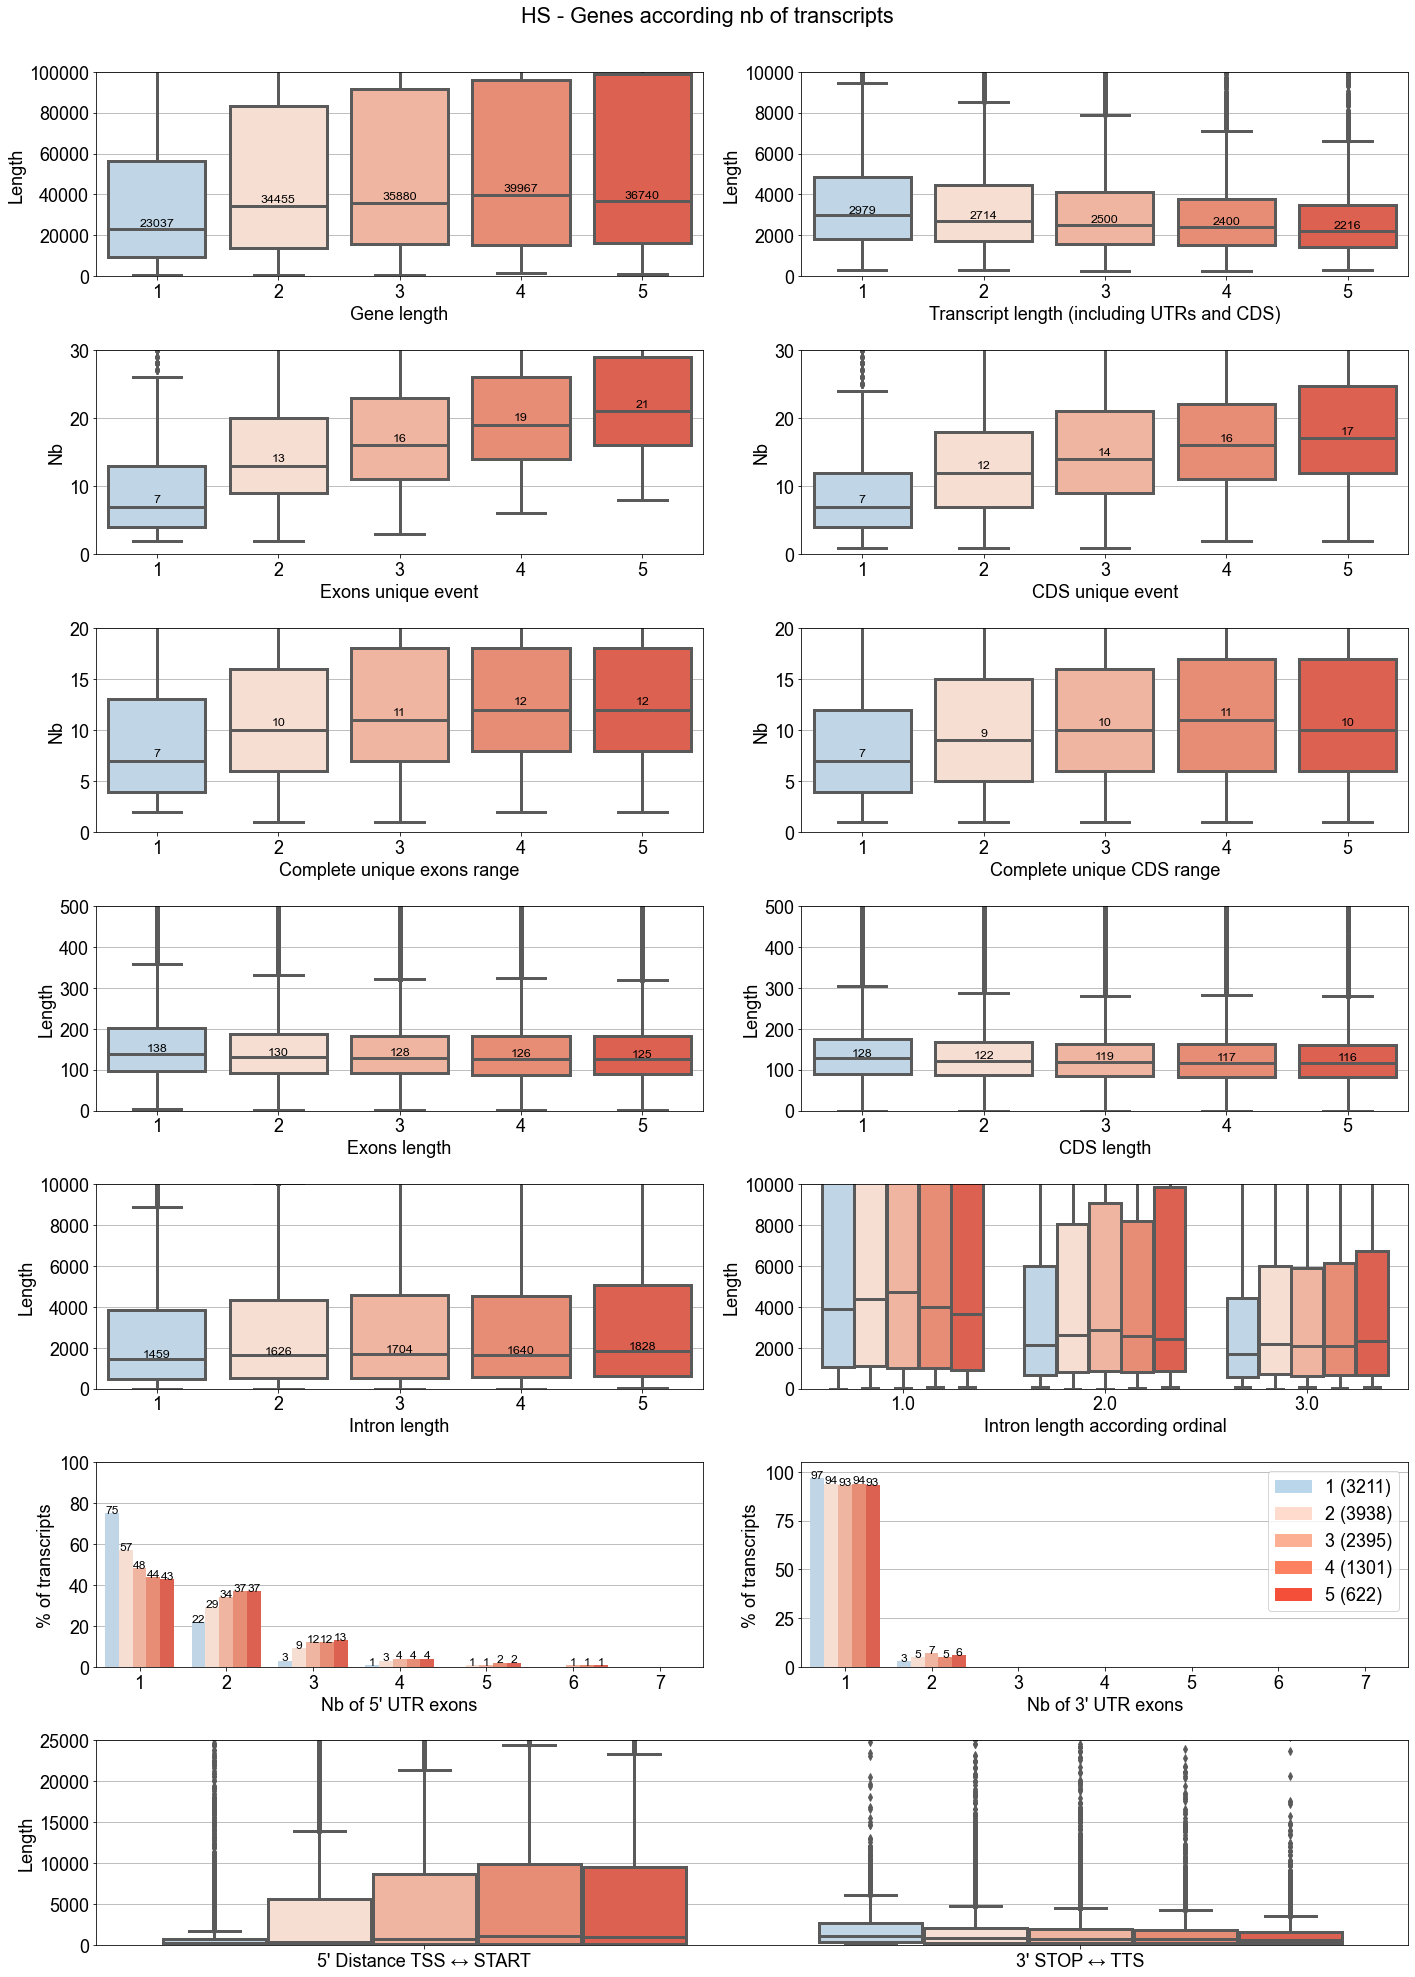

In [542]:
hs_genes_new = hs_genes.drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_mrna_new = hs_mrna.drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)

hs_five_UTR_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_five_UTR, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_three_UTR_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_three_UTR, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_exons_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_exons, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_cds_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_cds, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_introns_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_introns, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)


hs_five_UTR_new = hs_five_UTR_new.loc[(hs_five_UTR_new['Miso_siso'] <= 5)]
hs_three_UTR_new = hs_three_UTR_new.loc[(hs_three_UTR_new['Miso_siso'] <= 5)]
hs_exons_new = hs_exons_new.loc[(hs_exons_new['Miso_siso'] <= 5)]
hs_cds_new = hs_cds_new.loc[(hs_cds_new['Miso_siso'] <= 5)]
hs_introns_new = hs_introns_new.loc[(hs_introns_new['Miso_siso'] <= 5)]
hs_genes_new = hs_genes_new.loc[(hs_genes_new['Miso_siso'] <= 5)]
hs_mrna_new = hs_mrna_new.loc[(hs_mrna_new['Miso_siso'] <= 5)]


# hs_cds_new = hs_cds_new.groupby('GeneID').progress_apply(overlap_apply)
# hs_exons_new = hs_exons_new.groupby('GeneID').progress_apply(overlap_apply)

palette=sns.color_palette('Blues')[1:2] + sns.color_palette('Reds')[:4]
f = custom_figure(hs_five_UTR_new, hs_three_UTR_new, hs_exons_new, hs_cds_new, hs_introns_new, hs_genes_new, hs_mrna_new, palette=palette, title='HS - Genes according nb of transcripts')
f.savefig('/gstock/GeneIso/V2/Figures/HS_tr_count_box.png', dpi=300)

## HS x MM genes according nb of transcripts

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


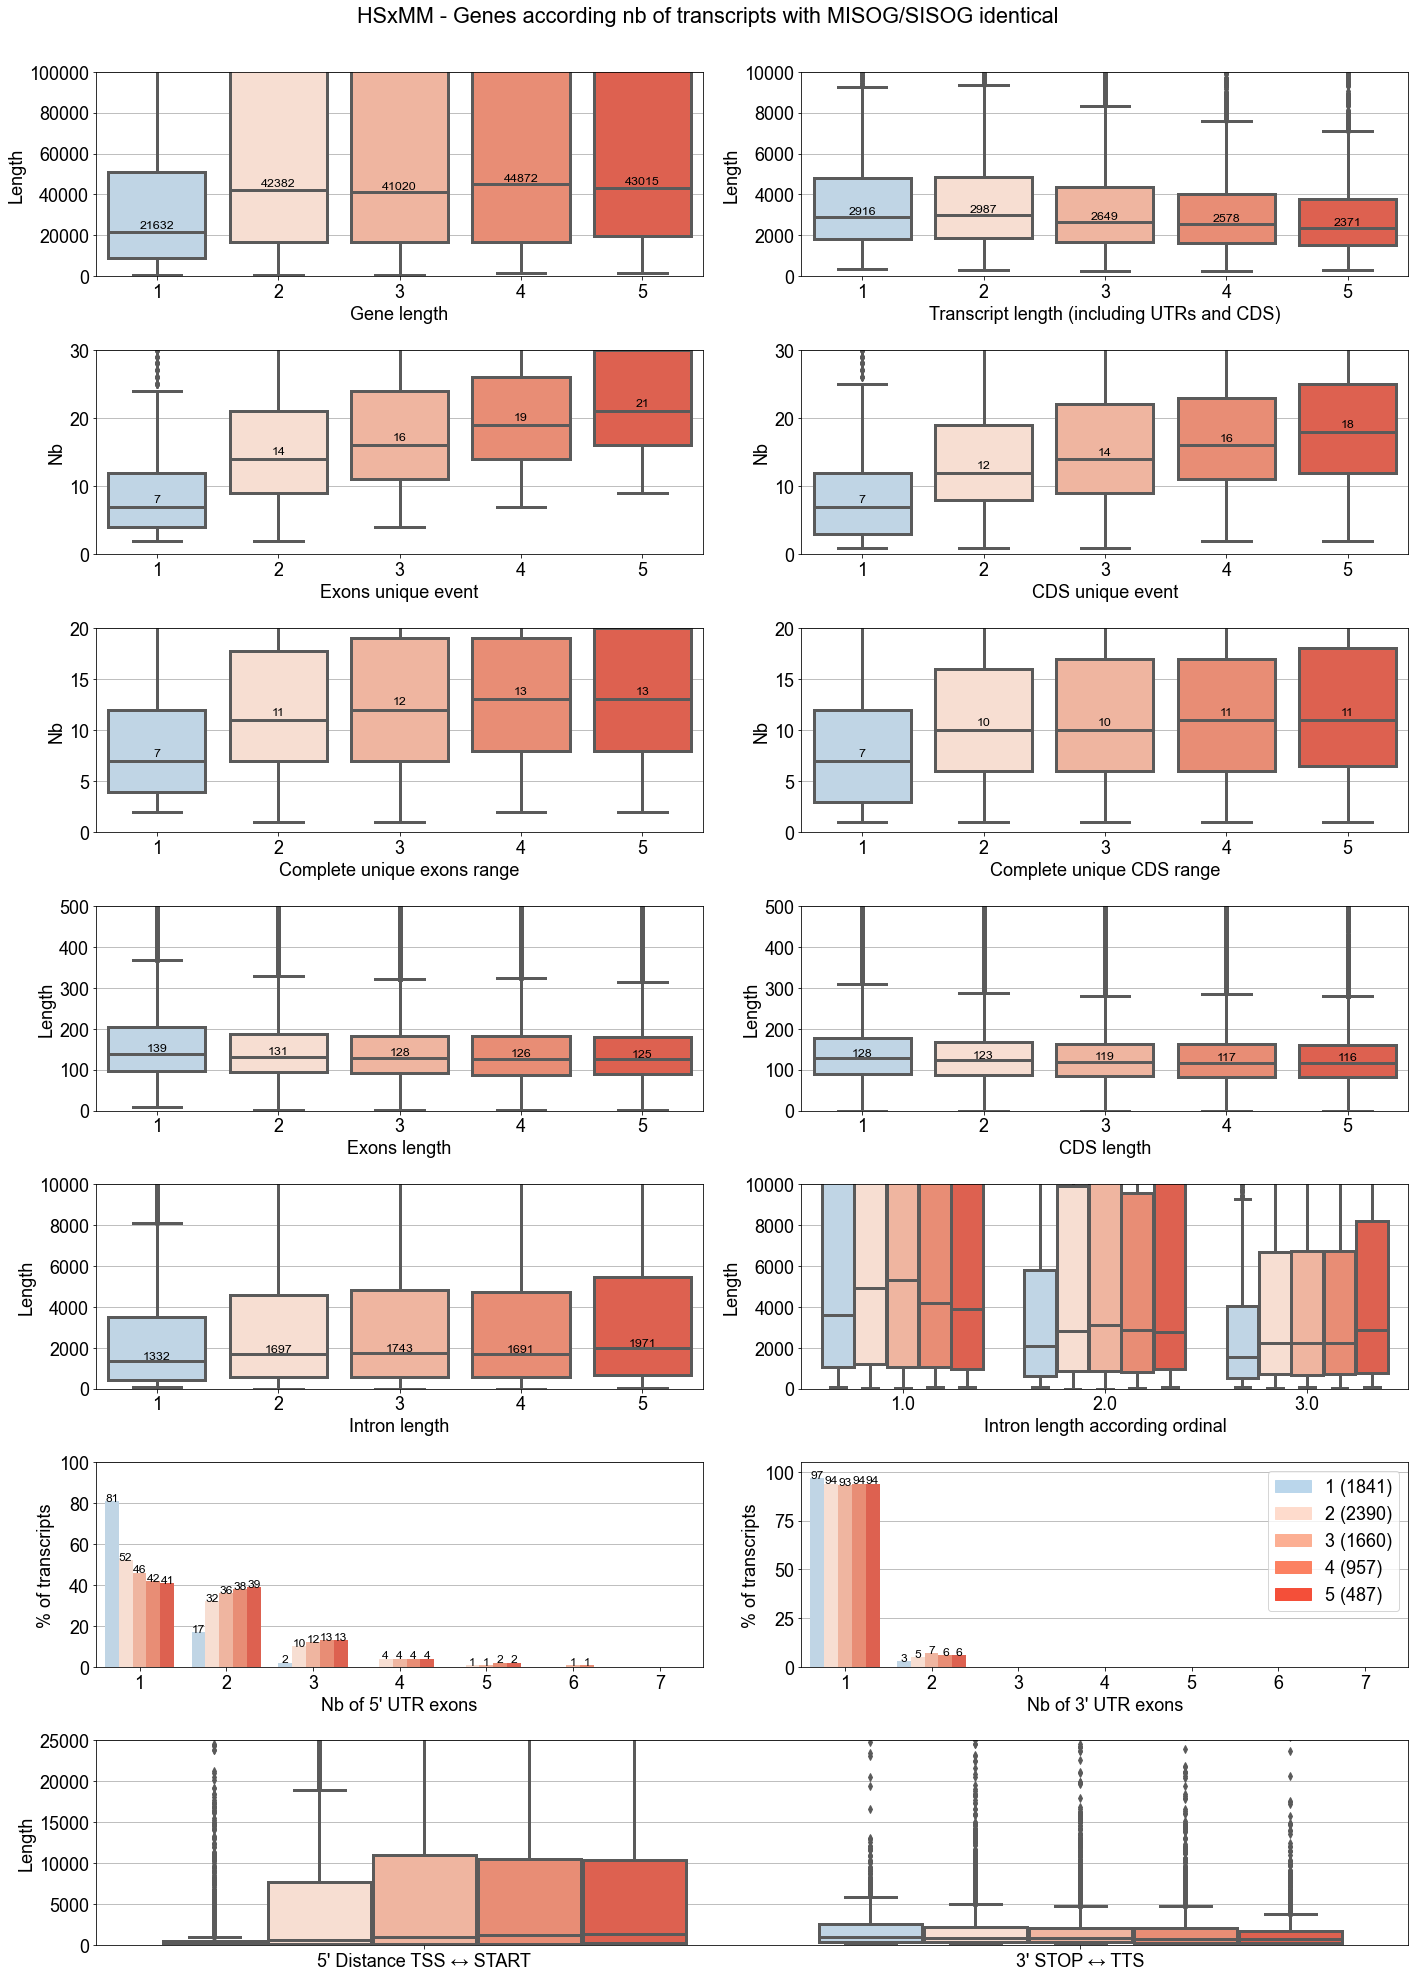

In [543]:
hs_genes_new = pd.merge( hs_genes.drop(['Miso_siso'], axis=1), new_count.drop(['Miso_siso'], axis=1), on='GeneID').rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_mrna_new = pd.merge( hs_mrna.drop(['Miso_siso'], axis=1), new_count.drop(['Miso_siso'], axis=1), on='GeneID').rename({'transcript_count' : 'Miso_siso'}, axis=1)


hs_five_UTR_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_five_UTR, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_three_UTR_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_three_UTR, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_exons_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_exons, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_cds_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_cds, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)
hs_introns_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_introns, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'transcript_count' : 'Miso_siso'}, axis=1)


hs_five_UTR_new = hs_five_UTR_new.loc[(hs_five_UTR_new['Miso_siso'] <= 5) & (hs_five_UTR_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]
hs_three_UTR_new = hs_three_UTR_new.loc[(hs_three_UTR_new['Miso_siso'] <= 5) & (hs_three_UTR_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]
hs_exons_new = hs_exons_new.loc[(hs_exons_new['Miso_siso'] <= 5) & (hs_exons_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]
hs_cds_new = hs_cds_new.loc[(hs_cds_new['Miso_siso'] <= 5) & (hs_cds_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]
hs_genes_new = hs_genes_new.loc[(hs_genes_new['Miso_siso'] <= 5) & (hs_genes_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]
hs_mrna_new = hs_mrna_new.loc[(hs_mrna_new['Miso_siso'] <= 5) & (hs_mrna_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]
hs_introns_new = hs_introns_new.loc[(hs_introns_new['Miso_siso'] <= 5) & (hs_introns_new['Miso_siso_full'].isin(['HS:Miso-MM:Miso', 'HS:Siso-MM:Siso']))]

palette=sns.color_palette('Blues')[1:2] + sns.color_palette('Reds')[:4]

# hs_cds_new = hs_cds_new.groupby('GeneID').progress_apply(overlap_apply)
# hs_exons_new = hs_exons_new.groupby('GeneID').progress_apply(overlap_apply)

f = custom_figure(hs_five_UTR_new, hs_three_UTR_new, hs_exons_new, hs_cds_new, hs_introns_new, hs_genes_new, hs_mrna_new, palette=palette, title='HSxMM - Genes according nb of transcripts with MISOG/SISOG identical')
f.savefig('/gstock/GeneIso/V2/Figures/HSxMM_tr_count_box.png', dpi=300)

## HS x MM genes according MISOG/SISOG categories

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


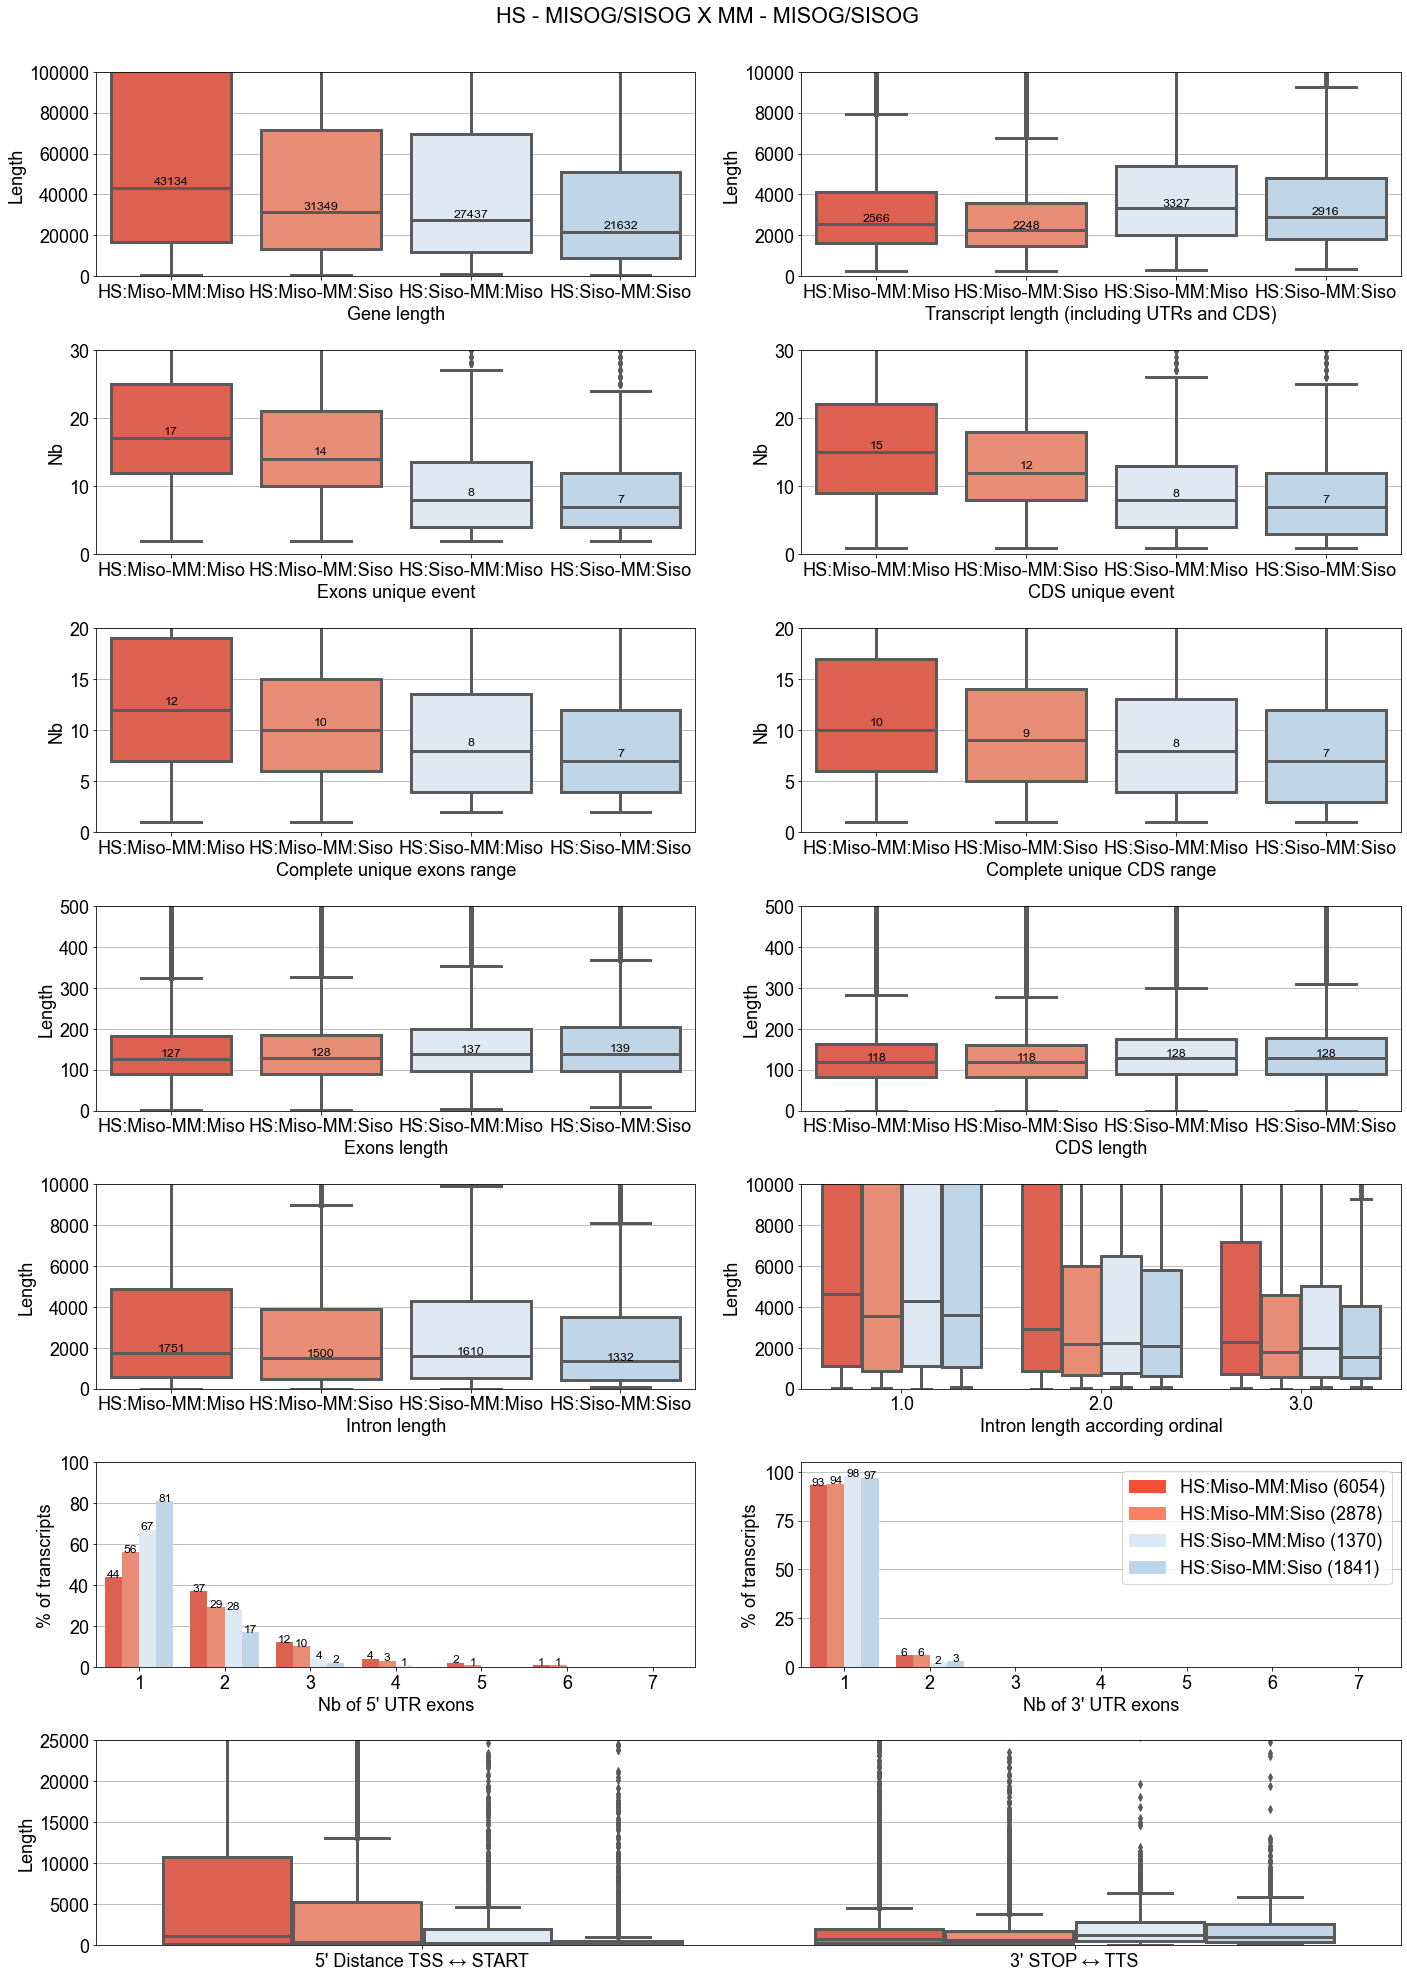

In [549]:
hs_genes_new = pd.merge( hs_genes.drop(['Miso_siso'], axis=1), new_count.drop(['Miso_siso'], axis=1), on='GeneID').rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)
hs_mrna_new = pd.merge( hs_mrna.drop(['Miso_siso'], axis=1), new_count.drop(['Miso_siso'], axis=1), on='GeneID').rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)

hs_five_UTR_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_five_UTR, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)
hs_three_UTR_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_three_UTR, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)
hs_exons_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_exons, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)
hs_cds_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_cds, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)
hs_introns_new = pd.merge(hs_genes[['GeneID', 'transcript_count']], pd.merge(hs_introns, new_count.drop(['Miso_siso'], axis=1), on='GeneID')).drop(['Miso_siso'], axis=1).rename({'Miso_siso_full' : 'Miso_siso'}, axis=1)

hs_five_UTR_new = hs_five_UTR_new.sort_values(by=['Miso_siso'], ascending=True)
hs_three_UTR_new = hs_three_UTR_new.sort_values(by=['Miso_siso'], ascending=True)
hs_exons_new = hs_exons_new.sort_values(by=['Miso_siso'], ascending=True)
hs_cds_new = hs_cds_new.sort_values(by=['Miso_siso'], ascending=True)
hs_introns_new = hs_introns_new.sort_values(by=['Miso_siso'], ascending=True)


# hs_cds_new

# hs_five_UTR_new = hs_five_UTR
# hs_three_UTR_new = hs_three_UTR
# hs_exons_new = hs_exons
# hs_cds_new = hs_cds
# hs_introns_new = hs_introns
# hs_genes_new = hs_genes
# hs_mrna_new = hs_mrna


# hs_cds_new = hs_cds_new.groupby('GeneID').progress_apply(overlap_apply)
# hs_exons_new = hs_exons_new.groupby('GeneID').progress_apply(overlap_apply)

palette= sns.color_palette('Reds')[3:4] + sns.color_palette('Reds')[2:3] + sns.color_palette('Blues')[0:1] + sns.color_palette('Blues')[1:2]

f = custom_figure(hs_five_UTR_new, hs_three_UTR_new, hs_exons_new, hs_cds_new, hs_introns_new, hs_genes_new, hs_mrna_new, palette=palette, title='HS - MISOG/SISOG X MM - MISOG/SISOG', alpha=1)
f.savefig('/gstock/GeneIso/V2/Figures/HSxMM_misog_sisog_box.png', dpi=300)

[((1, 'Miso'), (1, 'Siso')), ((2, 'Miso'), (2, 'Siso')), ((3, 'Miso'), (3, 'Siso')), ((4, 'Miso'), (4, 'Siso')), ((5, 'Miso'), (5, 'Siso')), ((1, 'Miso'), (2, 'Miso')), ((1, 'Miso'), (3, 'Miso')), ((1, 'Miso'), (4, 'Miso')), ((1, 'Miso'), (5, 'Miso')), ((1, 'Siso'), (2, 'Siso')), ((1, 'Siso'), (3, 'Siso')), ((1, 'Siso'), (4, 'Siso')), ((1, 'Siso'), (5, 'Siso'))]
  Miso_siso  Ordinal_nb  Length
0      Miso           1   180.0
1      Miso           2   128.0
2      Miso           3   124.0
3      Miso           4   123.0
4      Miso           5   123.0
  Miso_siso  Ordinal_nb  Length
5      Siso           1   216.5
6      Siso           2   143.0
7      Siso           3   133.0
8      Siso           4   130.0
9      Siso           5   128.0
2_Miso v.s. 2_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.726e-41 U_stat=5.219e+07
1_Miso v.s. 1_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.344e-53 U_stat=5.185e+07
3_Miso v.s. 3_S

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


  Miso_siso  Ordinal_nb_inverted  Length
0      Miso                   -5    98.5
1      Miso                   -4   102.0
2      Miso                   -3   103.0
3      Miso                   -2    32.0
4      Miso                   -1   722.0
  Miso_siso  Ordinal_nb_inverted  Length
5      Siso                   -5    87.0
6      Siso                   -4    92.0
7      Siso                   -3   107.0
8      Siso                   -2    79.0
9      Siso                   -1   763.0
-4_Miso v.s. -4_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.802e+03
-5_Miso v.s. -5_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.544e+03
-3_Miso v.s. -3_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.441e+04
-2_Miso v.s. -2_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.570e-17 U_stat=4.117e+05
-1_Miso v.s. -1_Siso: Mann-W

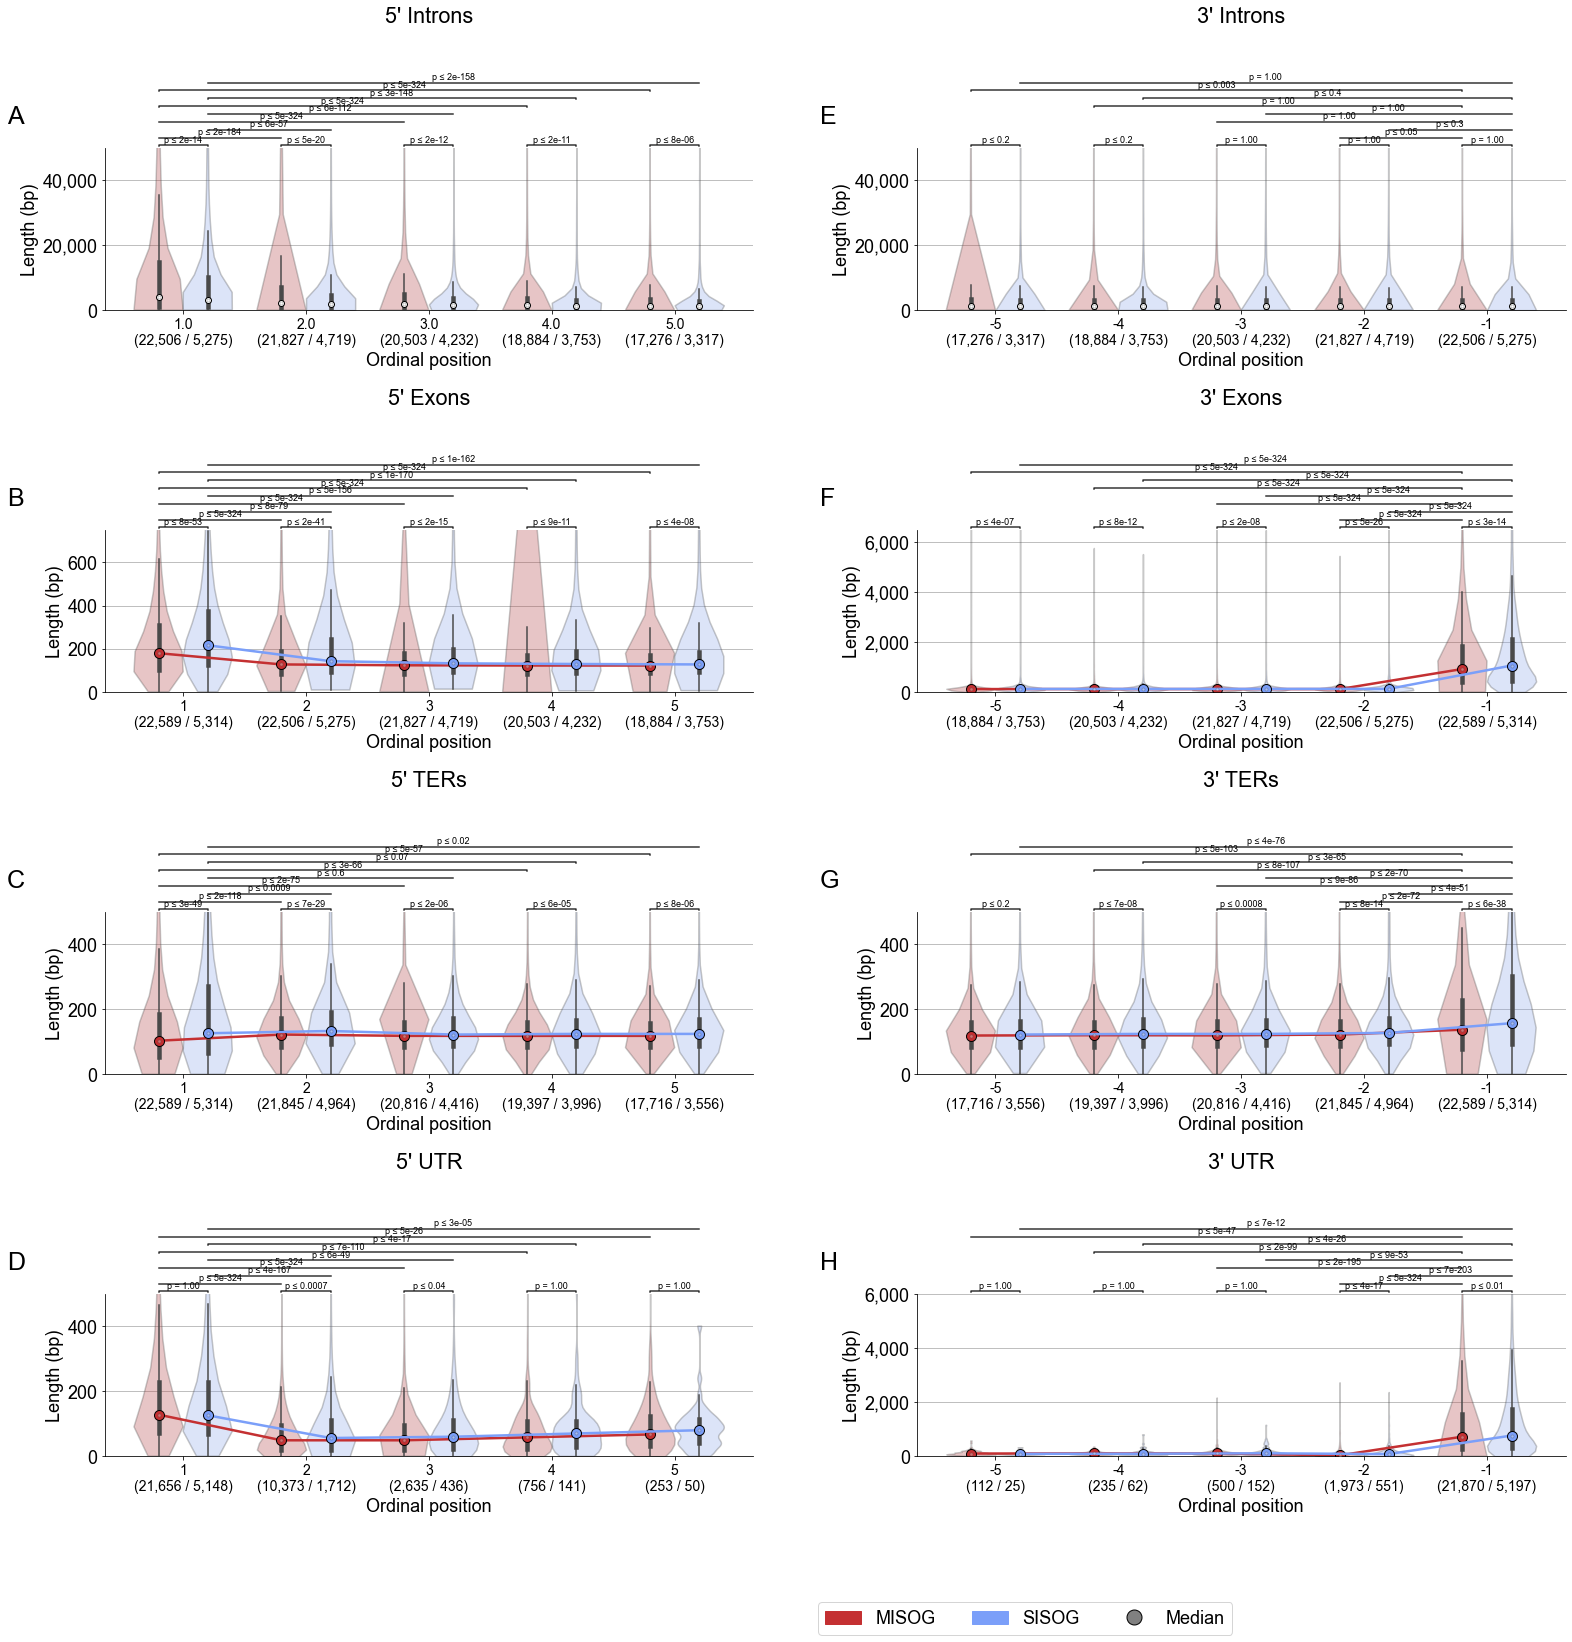

In [97]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(22,25))
palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }
box_pairs = [
    ((e,'Miso'),(e,'Siso')) for e in range(1,6)
]

box_pairs = box_pairs + [((1,'Miso'),(e,'Miso')) for e in range(2,6)] + [((1,'Siso'),(e,'Siso')) for e in range(2,6)]

print(box_pairs)

k_limit = 5
zscore_cutoff = 2
padding_title = 125


custom_boxplot(data=exons.loc[(exons['Ordinal_nb'] <= 5)], x='Ordinal_nb', y='Length', hue='Miso_siso', ax=ax[1][0], ylim=(0,750), xlabel='Ordinal position', palette=palette, title="5' Exons", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=cds.loc[(cds['Ordinal_nb'] <= 5)], x='Ordinal_nb', y='Length', hue='Miso_siso', xlabel='Ordinal position', ax=ax[2][0], ylim=(0,500), palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }, title="5' TERs", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=introns.loc[(introns['Ordinal_nb'] <= 5)], x='Ordinal_nb', y='Length', hue='Miso_siso', ax=ax[0][0], xlabel='Ordinal position', ylim=(0,5e4), palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }, title="5' Introns", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=five_UTR.loc[(five_UTR['Ordinal_nb'] <= 5)], x='Ordinal_nb', y='Length', hue='Miso_siso', ax=ax[3][0], xlabel='Ordinal position', ylim=(0,500), palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }, title="5' UTR", box_pairs=box_pairs, padding_title=padding_title)


box_pairs = [
    ((e,'Miso'),(e,'Siso')) for e in list(range(-5,0))
]
box_pairs = box_pairs + [((-1,'Miso'),(e,'Miso')) for e in range(-5,-1)] + [((-1,'Siso'),(e,'Siso')) for e in range(-5,-1)]

custom_boxplot(data=exons.loc[(exons['Ordinal_nb_inverted'] >= -5)], x='Ordinal_nb_inverted', y='Length', hue='Miso_siso',xlabel='Ordinal position', ax=ax[1][1], ylim=(0,6.5e3), palette=palette, title="3' Exons", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=cds.loc[(cds['Ordinal_nb_inverted'] >= -5)], x='Ordinal_nb_inverted', y='Length', hue='Miso_siso', xlabel='Ordinal position',ax=ax[2][1], ylim=(0,500), palette=palette, title="3' TERs", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=introns.loc[(introns['Ordinal_nb_inverted'] >= -5)], x='Ordinal_nb_inverted', y='Length', hue='Miso_siso',xlabel='Ordinal position', ax=ax[0][1], ylim=(0,50e3), palette=palette, title="3' Introns", box_pairs=box_pairs, padding_title=padding_title, )
custom_boxplot(data=three_UTR.loc[(three_UTR['Ordinal_nb_inverted'] >= -5)], x='Ordinal_nb_inverted', y='Length', hue='Miso_siso',  xlabel='Ordinal position',ax=ax[3][1], ylim=(0,6e3), palette=palette, title="3' UTR", box_pairs=box_pairs, padding_title=padding_title, legend=True, x_legend=1.35,)


i = 0
for n, a in enumerate(ax):
    sub_a = a[0]
    sub_a.text(-0.15, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=25, weight='bold')
    i += 1
for n, a in enumerate(ax):
    sub_a = a[1]
    sub_a.text(-0.15, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=25, weight='bold')
    i += 1

plt.tight_layout()

# figure_path = base_dir + yaml['Figures']['FigS1']
# f.savefig(figure_path, dpi=600)

# Enrichment into changing category genes

In [551]:
# Compute Nb of Unique exons

def overlaps(ranges):
    ranges = sorted(ranges)  # If our inputs are garunteed sorted, we can skip this
    it = iter(ranges)
    try:
        curr_start, curr_stop = next(it)
        # overlaps = False  # If we want to exclude output ranges not produced by overlapping input ranges
    except StopIteration:
        return
    for start, stop in it:
        if curr_start <= start <= curr_stop:  # Assumes intervals are closed
            curr_stop = max(curr_stop, stop)
            # overlaps = True
        else:
            # if overlaps:
            yield curr_start, curr_stop
            curr_start, curr_stop = start, stop
            # overlaps = False
    # if overlaps:
    yield curr_start, curr_stop

def overlap_apply(df):
    r = df.drop_duplicates(subset=['ranges'])
    r = r.ranges.tolist()
    r = [(int(e.split('-')[0]), int(e.split('-')[1])) for e in r]
    df['CDS_unique_nb'] = len(list(overlaps(r)))
    return df


# Unique CDS

In [214]:
cds[['Miso_siso', 'GeneID', 'CDS_unique_nb']].drop_duplicates().groupby('Miso_siso').describe()

CDS_unique_nb                                                   
                  count       mean        std  min  25%   50%   75%    max
Miso_siso                                                                 
Miso             8933.0  12.046009   9.891078  1.0  5.0  10.0  16.0  145.0
Siso             3221.0   9.891028  10.144985  1.0  4.0   7.0  12.0  107.0

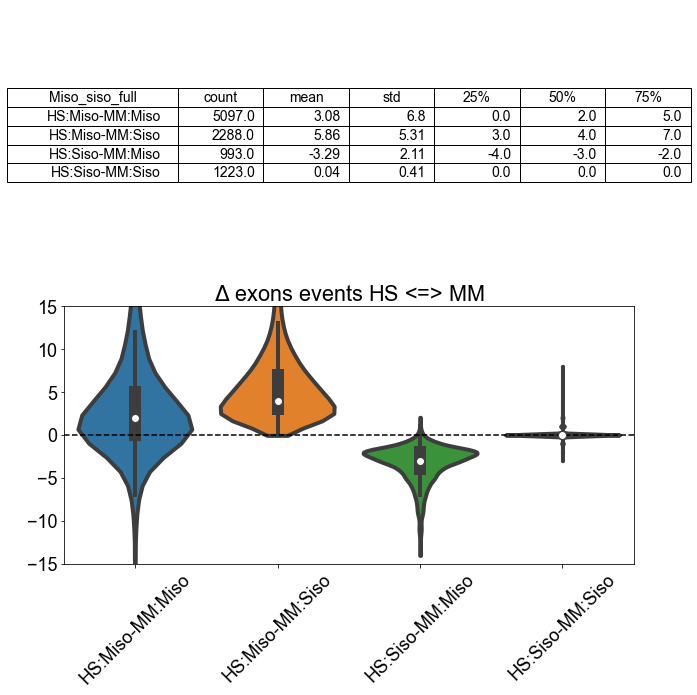

In [178]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-15,15)

plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")

ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ exons events HS <=> MM')
plt.tight_layout()
f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_exon_events.png', dpi=300)

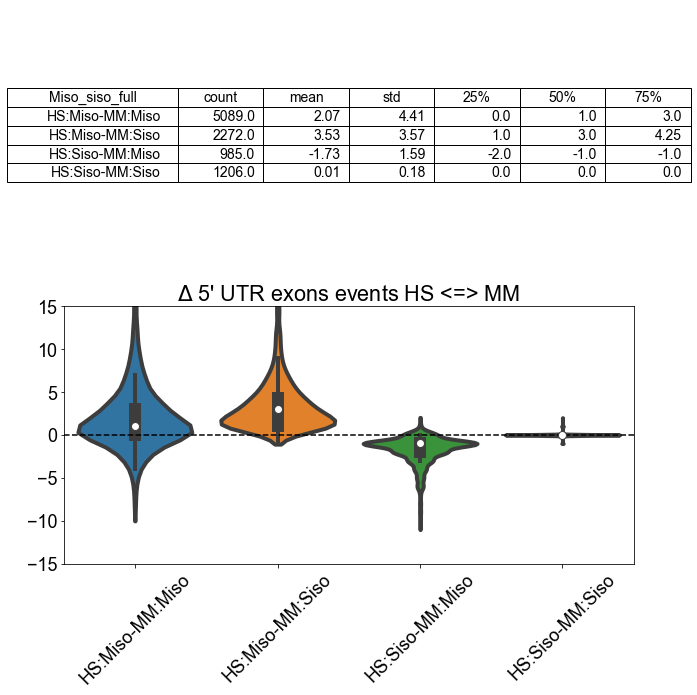

In [87]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-15,15)

plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")

ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 5' UTR exons events HS <=> MM")
plt.tight_layout()
f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_exon5UTR_events.png', dpi=300)

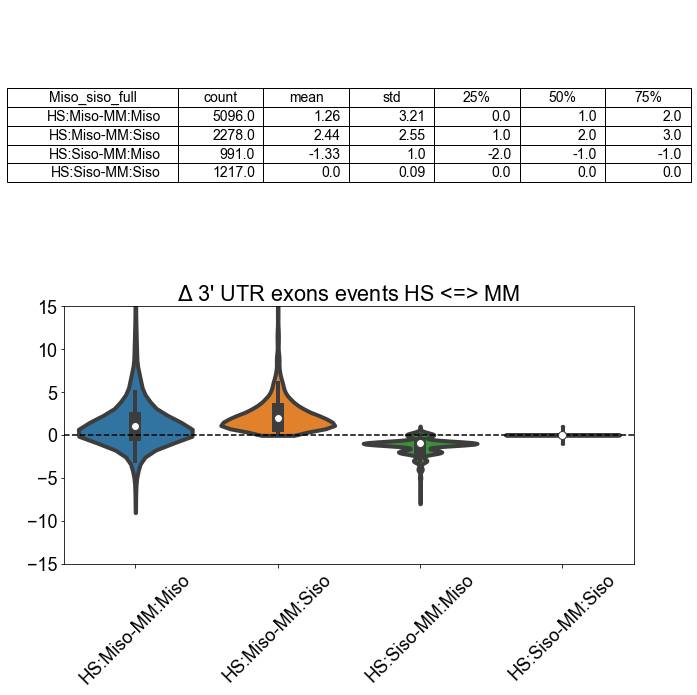

In [86]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-15,15)

plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")

ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 3' UTR exons events HS <=> MM")
plt.tight_layout()
f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_exon3UTR_events.png', dpi=300)

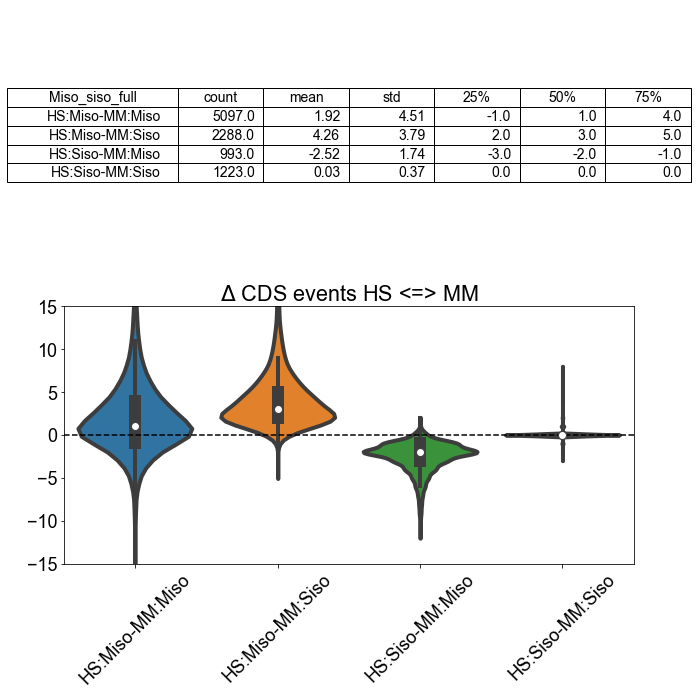

In [16]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_cds.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - cds.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-15,15)

plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")

ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ CDS events HS <=> MM')
plt.tight_layout()
f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_cds_events.png', dpi=300)

In [134]:
test = pd.merge(
    pd.merge(
        hs_exons.groupby(['Miso_siso', 'GeneID'])['CDS_unique_nb'].unique().apply(lambda r: r[0]).reset_index().rename({'Miso_siso' : 'HS_Miso_siso', 'CDS_unique_nb' : 'HS_Unique_nb'}, axis=1),
        exons.groupby(['Miso_siso', 'GeneID'])['CDS_unique_nb'].unique().apply(lambda r: r[0]).reset_index().rename({'Miso_siso' : 'HS_Miso_siso2', 'CDS_unique_nb' : 'MM_Unique_nb'}, axis=1),
        on='GeneID'
),
    new_count,
    on='GeneID'
)
test['Delta'] = test['HS_Unique_nb'] - test['MM_Unique_nb']
test.groupby(['Miso_siso_full'])['Delta'].describe()

,count,mean,std,min,25%,50%,75%,max
Miso_siso_full,,,,,,,,
HS:Miso-MM:Miso,6054.0,0.533532,1.863715,-23.0,0.0,0.0,1.0,20.0
HS:Miso-MM:Siso,2879.0,0.982980,1.553333,-9.0,0.0,1.0,1.0,19.0
HS:Siso-MM:Miso,1375.0,-0.552000,1.039970,-6.0,-1.0,0.0,0.0,5.0
HS:Siso-MM:Siso,1846.0,0.040087,0.413219,-3.0,0.0,0.0,0.0,8.0


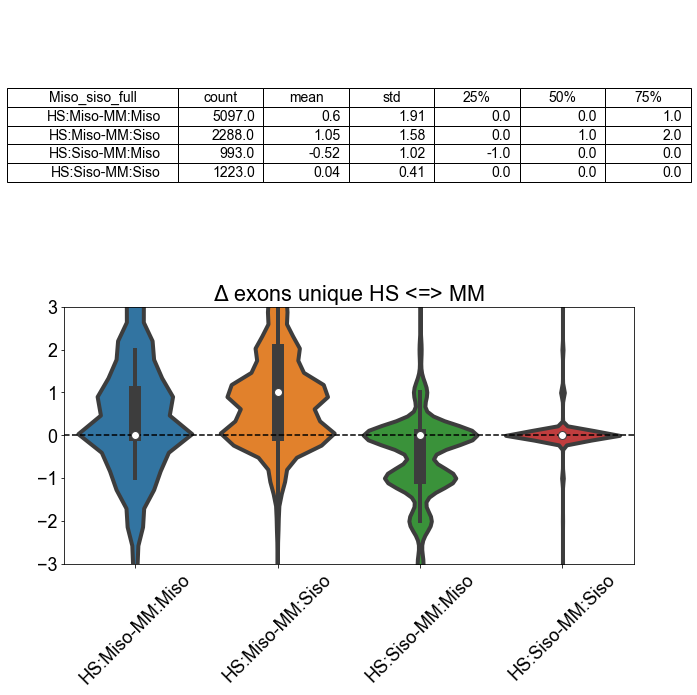

In [17]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ exons unique HS <=> MM')
ax[1].set_ylim(-3,3)
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_exon_unique.png', dpi=300)

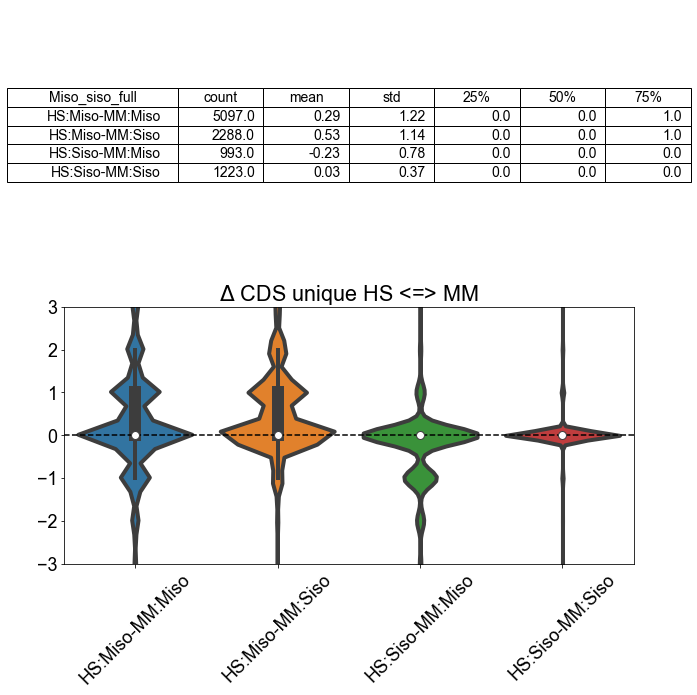

In [88]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ CDS unique HS <=> MM')
ax[1].set_ylim(-3,3)
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_cds_unique.png', dpi=300)

In [94]:
genes.columns

Index(['Miso_siso', 'GeneID', 'Gene name',
       'mmusculus_homolog_associated_gene_name',
       'mmusculus_homolog_ensembl_gene', 'ensembl_gene_id',
       'ensembl_transcript_id', 'ensembl_peptide_id', 'description',
       'chromosome_name', 'start_position', 'end_position', 'strand',
       'transcript_start', 'transcript_end', 'transcription_start_site',
       'transcript_length', 'transcript_tsl', 'transcript_gencode_basic',
       'transcript_appris', 'external_gene_name', 'external_gene_source',
       'external_transcript_name', 'external_transcript_source_name',
       'transcript_count', 'percentage_gene_gc_content', 'gene_biotype',
       'transcript_biotype', 'source', 'transcript_source'],
      dtype='object')

In [100]:
ratio = hs_cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]
ratio = pd.merge(genes[['Gene name', 'GeneID', 'mmusculus_homolog_associated_gene_name']].drop_duplicates(), ratio, on='GeneID')


In [101]:
ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso'])].sort_values(by='Ratio', ascending=False).groupby(['Miso_siso_full']).head(20)

,Gene name,GeneID,mmusculus_homolog_associated_gene_name,ensembl_gene_id,Miso_siso_mm,Miso_siso_full,Miso_siso,Ratio
3317,IRAG2,ENSG00000118308,Lrmp,ENSMUSG00000030263,Siso,HS:Miso-MM:Siso,Miso,21.0
8318,TNRC18,ENSG00000182095,Tnrc18,ENSMUSG00000039477,Siso,HS:Miso-MM:Siso,Miso,14.0
6016,CWC27,ENSG00000153015,Cwc27,ENSMUSG00000021715,Siso,HS:Miso-MM:Siso,Miso,10.0
4048,NDUFA10,ENSG00000130414,Ndufa10,ENSMUSG00000026260,Siso,HS:Miso-MM:Siso,Miso,9.0
3901,SEM1,ENSG00000127922,Sem1,ENSMUSG00000042541,Siso,HS:Miso-MM:Siso,Miso,8.0
2593,ELP4,ENSG00000109911,Elp4,ENSMUSG00000027167,Siso,HS:Miso-MM:Siso,Miso,7.0
5201,TBCD,ENSG00000141556,Tbcd,ENSMUSG00000039230,Siso,HS:Miso-MM:Siso,Miso,6.0
2865,NNT,ENSG00000112992,Nnt,ENSMUSG00000116207,Siso,HS:Miso-MM:Siso,Miso,6.0
5164,SSH2,ENSG00000141298,Ssh2,ENSMUSG00000037926,Siso,HS:Miso-MM:Siso,Miso,5.0
6403,ALG8,ENSG00000159063,Alg8,ENSMUSG00000035704,Siso,HS:Miso-MM:Siso,Miso,5.0


In [102]:
ratio.loc[ratio['Miso_siso_full'].isin(['HS:Siso-MM:Miso'])].sort_values(by='Ratio', ascending=True).groupby(['Miso_siso_full']).head(20)

,Gene name,GeneID,mmusculus_homolog_associated_gene_name,ensembl_gene_id,Miso_siso_mm,Miso_siso_full,Miso_siso,Ratio
8692,ERC2,ENSG00000187672,Erc2,ENSMUSG00000040640,Miso,HS:Siso-MM:Miso,Siso,-5.0
8842,NTNG2,ENSG00000196358,Ntng2,ENSMUSG00000035513,Miso,HS:Siso-MM:Miso,Siso,-4.0
2378,SH3GL2,ENSG00000107295,Sh3gl2,ENSMUSG00000028488,Miso,HS:Siso-MM:Miso,Siso,-4.0
7493,LRP1B,ENSG00000168702,Lrp1b,ENSMUSG00000049252,Miso,HS:Siso-MM:Miso,Siso,-3.0
4438,DOCK2,ENSG00000134516,Dock2,ENSMUSG00000020143,Miso,HS:Siso-MM:Miso,Siso,-3.0
8984,PSAP,ENSG00000197746,Psap,ENSMUSG00000004207,Miso,HS:Siso-MM:Miso,Siso,-3.0
1188,FAT1,ENSG00000083857,Fat1,ENSMUSG00000070047,Miso,HS:Siso-MM:Miso,Siso,-3.0
4458,DSG3,ENSG00000134757,Dsg3,ENSMUSG00000056632,Miso,HS:Siso-MM:Miso,Siso,-3.0
8752,CFAP54,ENSG00000188596,Cfap54,ENSMUSG00000020014,Miso,HS:Siso-MM:Miso,Siso,-3.0
1331,P2RX7,ENSG00000089041,P2rx7,ENSMUSG00000029468,Miso,HS:Siso-MM:Miso,Siso,-3.0


In [170]:
five_UTR.groupby(['Miso_siso', 'GeneID'])['CDS_unique_nb'].unique().apply(lambda r: r[0])

Miso_siso  GeneID         
Miso       ENSG00000000003    1
           ENSG00000000419    2
           ENSG00000000457    3
           ENSG00000000460    1
           ENSG00000000938    4
                             ..
Siso       ENSG00000283528    2
           ENSG00000283632    3
           ENSG00000283706    1
           ENSG00000283900    3
           ENSG00000284753    1
Name: CDS_unique_nb, Length: 12099, dtype: int64

In [171]:
new_count

,GeneID,ensembl_gene_id,Miso_siso,Miso_siso_mm,Miso_siso_full
0,ENSG00000000003,ENSMUSG00000067377,Miso,Siso,HS:Miso-MM:Siso
1,ENSG00000000005,ENSMUSG00000031250,Siso,Siso,HS:Siso-MM:Siso
2,ENSG00000000419,ENSMUSG00000078919,Miso,Miso,HS:Miso-MM:Miso
4,ENSG00000000457,ENSMUSG00000026584,Miso,Miso,HS:Miso-MM:Miso
7,ENSG00000000460,ENSMUSG00000041406,Miso,Miso,HS:Miso-MM:Miso
...,...,...,...,...,...
27895,ENSG00000284194,ENSMUSG00000091780,Miso,Miso,HS:Miso-MM:Miso
27897,ENSG00000284308,ENSMUSG00000030030,Miso,Miso,HS:Miso-MM:Miso
27899,ENSG00000284753,ENSMUSG00000115219,Siso,Miso,HS:Siso-MM:Miso
27901,ENSG00000284770,ENSMUSG00000039233,Miso,Siso,HS:Miso-MM:Siso


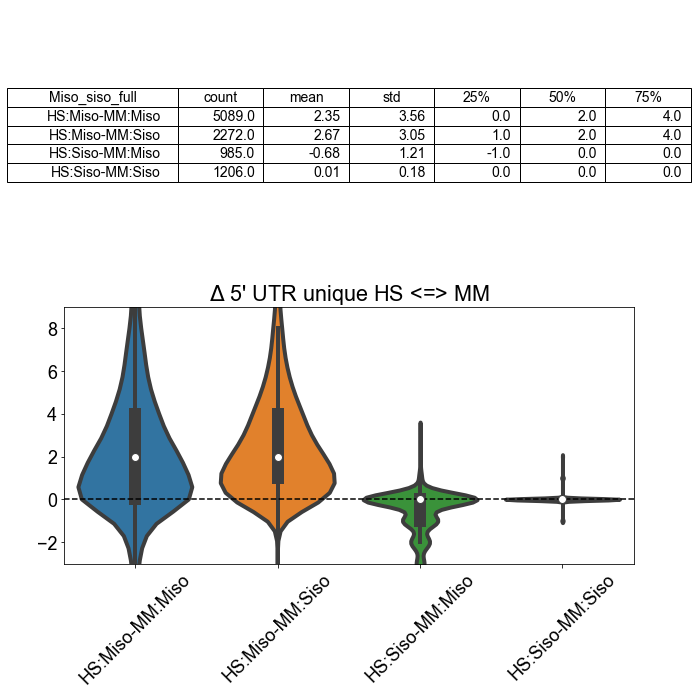

In [32]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, ax=ax[1], scale="width")
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 5' UTR unique HS <=> MM")
ax[1].set_ylim(-3,9)
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_fiveUTR_unique.png', dpi=300)

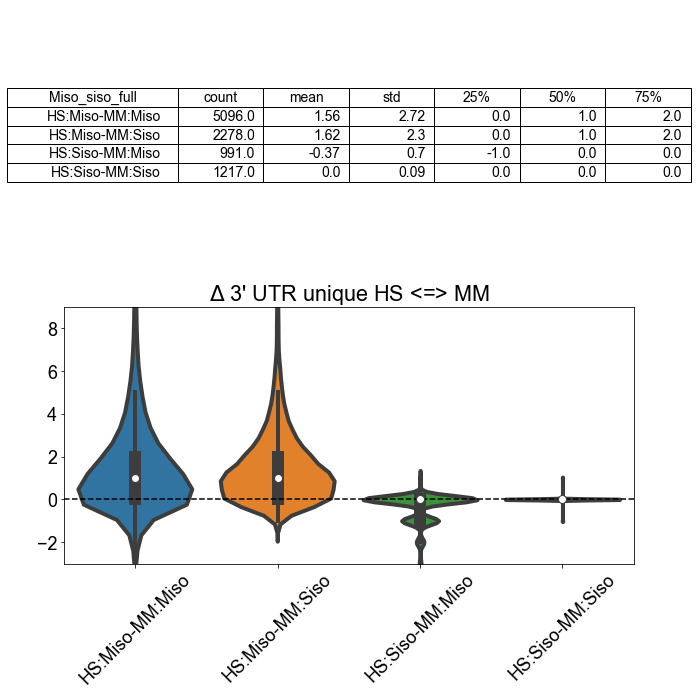

In [21]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]

f,ax=plt.subplots(nrows=2, figsize=(10,10))

ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()
ratio_stats

table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help

sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, ax=ax[1], scale="width")
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 3' UTR unique HS <=> MM")
ax[1].set_ylim(-3,9)
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_threeUTR_unique.png', dpi=300)

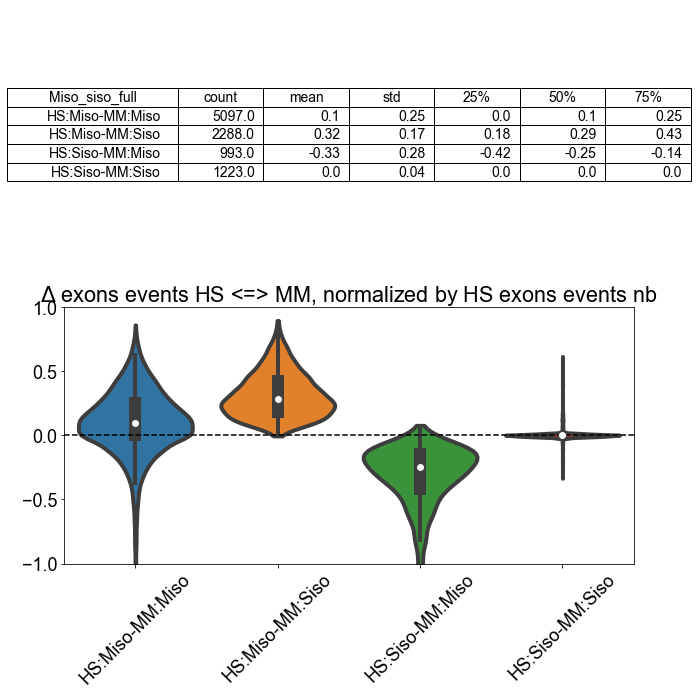

In [22]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()) / hs_exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help


sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ exons events HS <=> MM, normalized by HS exons events nb')
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_exon_events_normalized_by_HS.png', dpi=300)

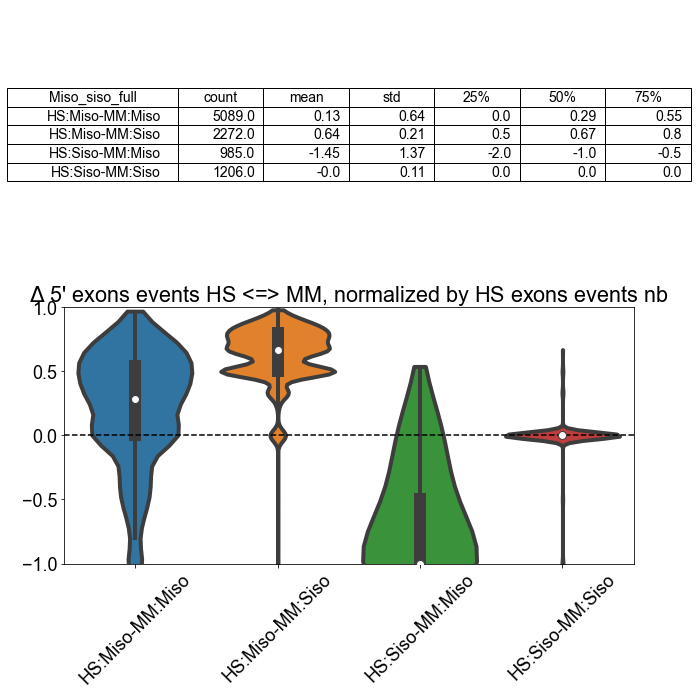

In [39]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()) / hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help


sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 5' exons events HS <=> MM, normalized by HS exons events nb")
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_5UTRexon_events_normalized_by_HS.png', dpi=300)

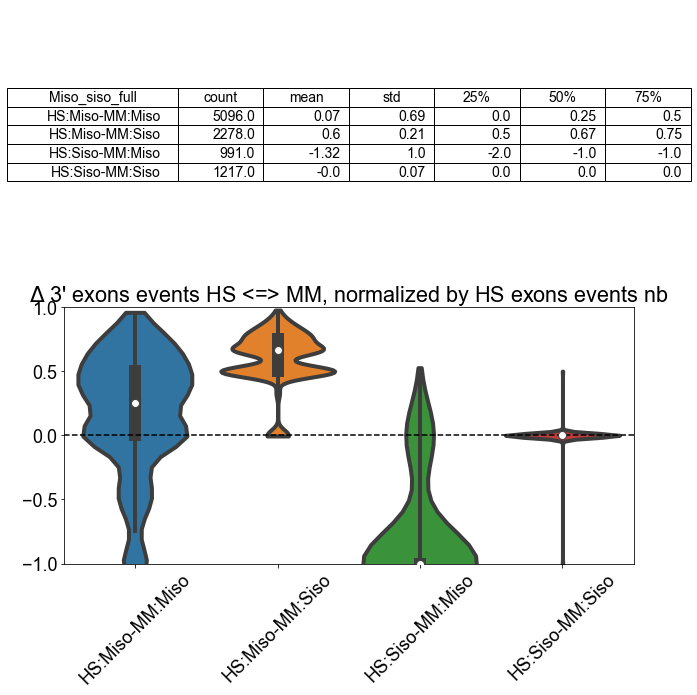

In [41]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() - three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()) / hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help


sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 3' exons events HS <=> MM, normalized by HS exons events nb")
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_3UTRexon_events_normalized_by_HS.png', dpi=300)

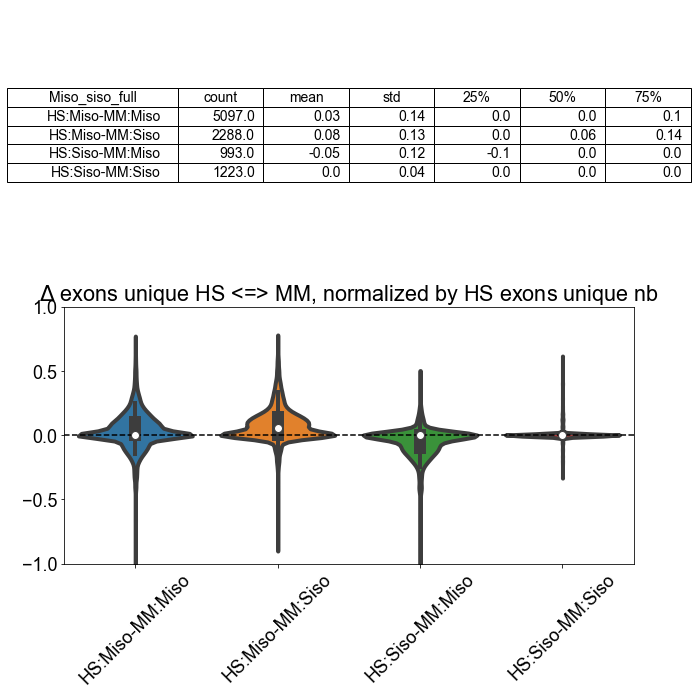

In [26]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])) / hs_exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ exons unique HS <=> MM, normalized by HS exons unique nb')
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_exon_unique_normalized_by_HS.png', dpi=300)

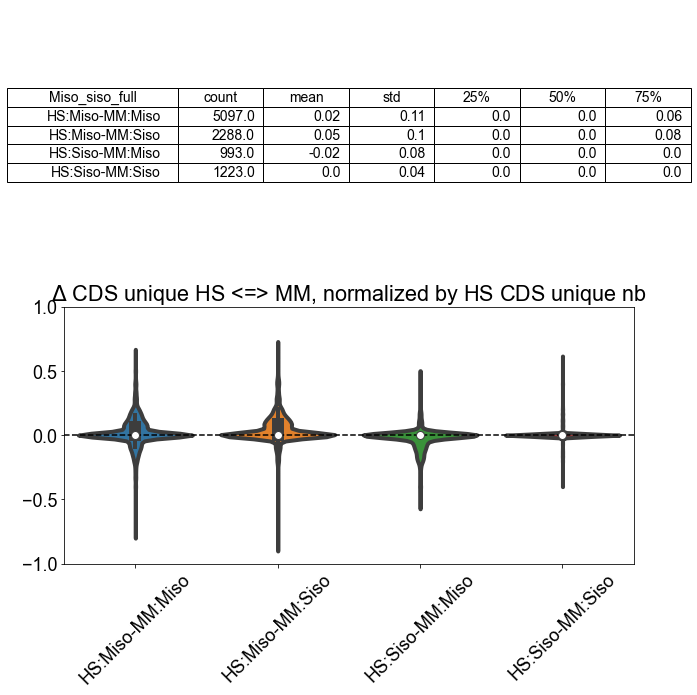

In [62]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])) / hs_cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r'$\Delta$ CDS unique HS <=> MM, normalized by HS CDS unique nb')
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_cds_unique_normalized_by_HS.png', dpi=300)

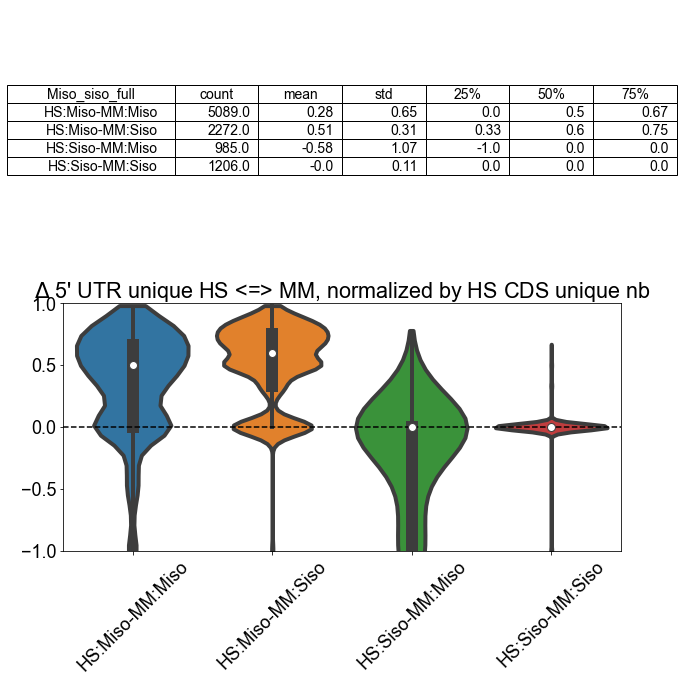

In [29]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])) / hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 5' UTR unique HS <=> MM, normalized by HS CDS unique nb")

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_5UTR_unique_normalized_by_HS.png', dpi=300)

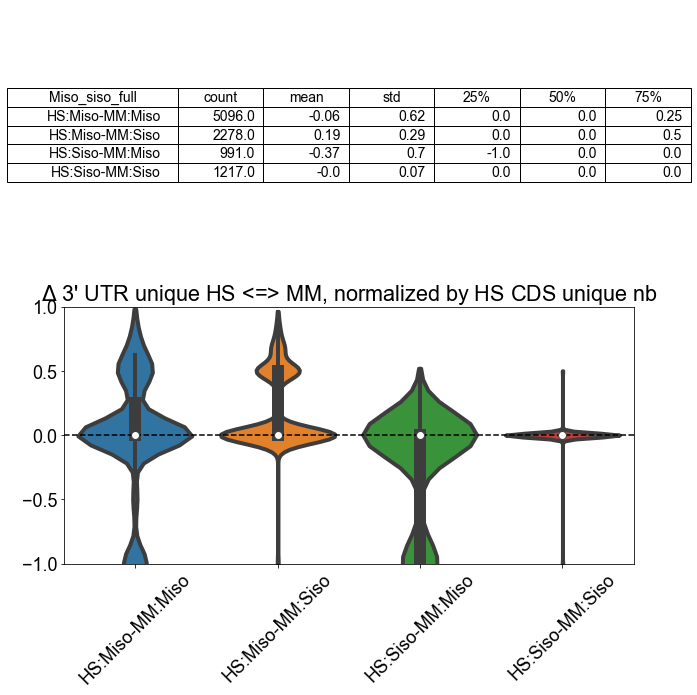

In [63]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_cds[['GeneID', 'Unique_nb']].drop_duplicates()

ratio = (hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0]) - three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])) / hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r: r[0])
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['Unique_nb'] >= 5].GeneID.values.tolist())]


ratio_stats = ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2] + [0.1] * (len(list(ratio_stats.columns))-1))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(-1,1)
plt.axhline(0, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title(r"$\Delta$ 3' UTR unique HS <=> MM, normalized by HS CDS unique nb")
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/delta_3UTR_unique_normalized_by_HS.png', dpi=300)

,count,mean,std,min,25%,50%,75%,max
Miso_siso_full,,,,,,,,
HS:Miso-MM:Miso,5521.0,1.238900,0.511409,0.347826,1.000000,1.117647,1.363636,9.750000
HS:Miso-MM:Siso,2465.0,1.720360,0.985775,1.000000,1.235294,1.428571,1.833333,25.333333
HS:Siso-MM:Miso,1029.0,0.772346,0.134169,0.300000,0.700000,0.791667,0.875000,1.666667
HS:Siso-MM:Siso,1247.0,1.009412,0.108814,0.750000,1.000000,1.000000,1.000000,4.000000


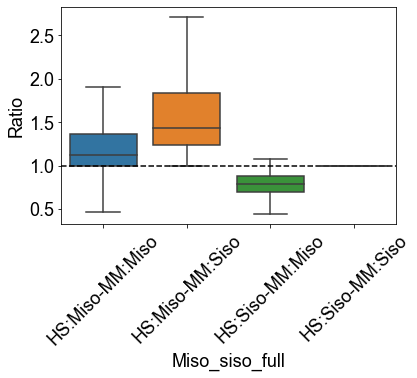

In [47]:
# hs_exons = hs_exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

# exons = exons.drop_duplicates(subset=['Miso_siso', 'GeneID', 'Exon region start (bp)', 'Exon region end (bp)', 'Length'])

cds_count = hs_exons[['GeneID', 'CDS_unique_nb']].drop_duplicates()

ratio = hs_exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique() / exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique()
ratio = ratio.dropna().rename('Ratio')
ratio = ratio.reset_index()
ratio = pd.merge(new_count.drop(['Miso_siso'], axis=1), ratio, on='GeneID')
# ratio = ratio.loc[ratio['Miso_siso_full'].isin(['HS:Miso-MM:Siso', 'HS:Siso-MM:Miso'])]
ratio = ratio.loc[ratio['GeneID'].isin(cds_count.loc[cds_count['CDS_unique_nb'] >= 5].GeneID.values.tolist())]

ratio = pd.merge(hs_exons.groupby(['GeneID'])['ranges'].nunique().rename('HS_count').reset_index(), ratio, on='GeneID')
ratio = pd.merge(exons.groupby(['GeneID'])['ranges'].nunique().rename('MM_count').reset_index(), ratio, on='GeneID')



f,ax=plt.subplots()
sns.boxplot(data=ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True), x='Miso_siso_full', y='Ratio', showfliers=False, ax=ax)
plt.axhline(1, ls='--', color='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ratio.sort_values(['Miso_siso_full', 'Ratio'], ascending=True).groupby('Miso_siso_full')['Ratio'].describe()
# ratio

In [105]:
ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

,Miso_siso_full,variable,count,mean,std,25%,50%,75%
0,HS:Miso-MM:Miso,HS_count,6054.0,20.26,12.72,12.0,17.0,25.0
1,HS:Miso-MM:Miso,MM_count,6054.0,17.42,11.02,10.0,15.0,22.0
2,HS:Miso-MM:Siso,HS_count,2879.0,16.72,10.48,10.0,14.0,21.0
3,HS:Miso-MM:Siso,MM_count,2879.0,11.06,8.83,5.0,9.0,14.0
4,HS:Siso-MM:Miso,HS_count,1375.0,10.86,10.66,4.0,8.0,13.5
5,HS:Siso-MM:Miso,MM_count,1375.0,14.14,10.96,8.0,12.0,17.0
6,HS:Siso-MM:Siso,HS_count,1846.0,9.62,9.61,4.0,7.0,12.0
7,HS:Siso-MM:Siso,MM_count,1846.0,9.58,9.61,4.0,7.0,12.0


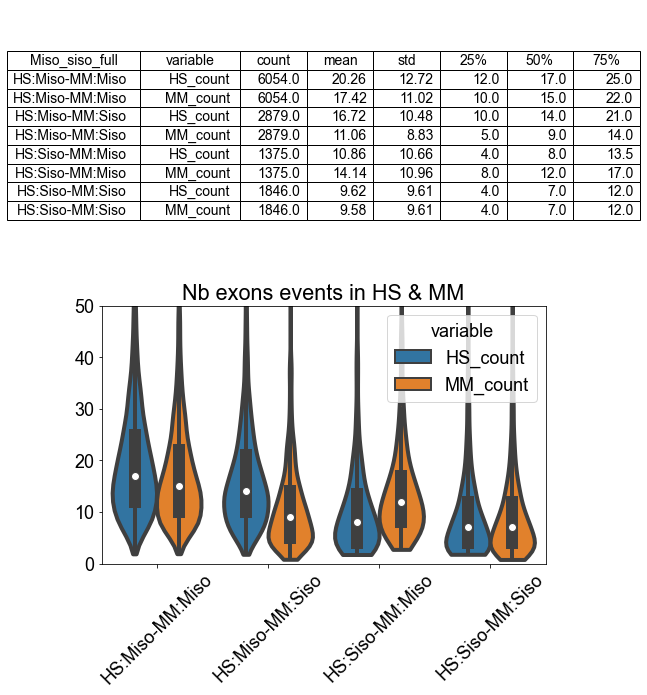

In [78]:
data = pd.merge(
    pd.merge(
        hs_exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        exons.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,50)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb exons events in HS & MM')
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_exon_events.png', dpi=300)


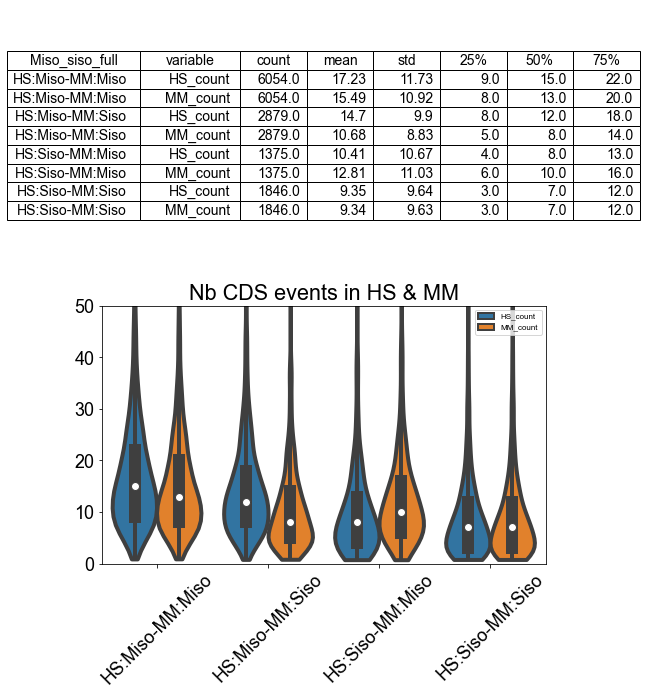

In [73]:
data = pd.merge(
    pd.merge(
        hs_cds.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        cds.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,50)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb CDS events in HS & MM')
ax[1].legend(fontsize=8, title='')
plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_cds_events.png', dpi=300)


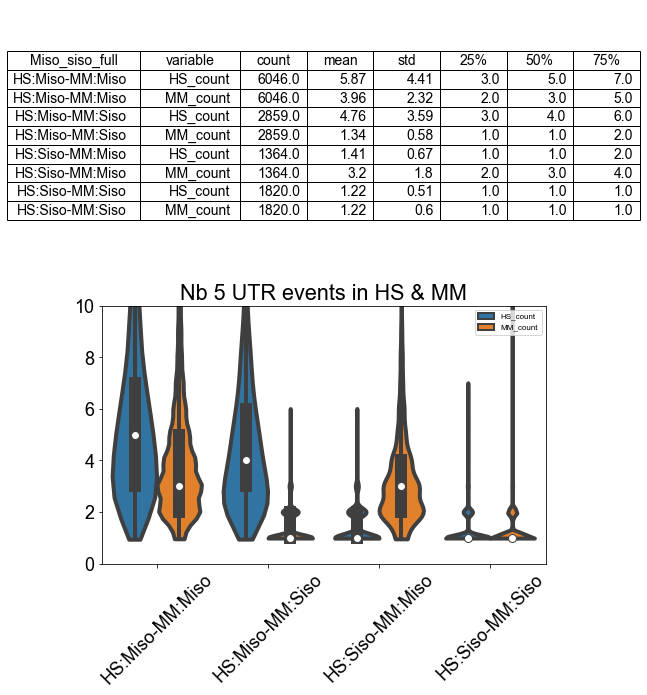

In [74]:
data = pd.merge(
    pd.merge(
        hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        five_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,10)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb 5 UTR events in HS & MM')
ax[1].legend(fontsize=8, title='')

plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_5UTR_events.png', dpi=300)


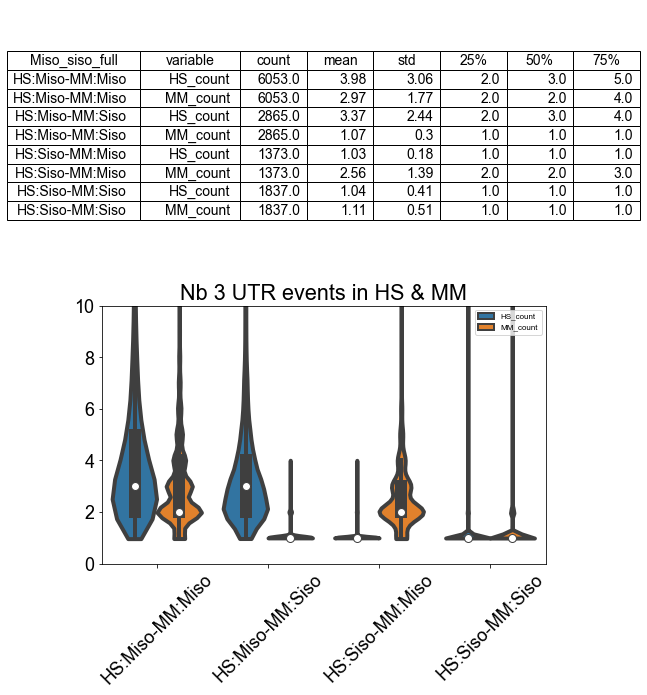

In [75]:
data = pd.merge(
    pd.merge(
        hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        three_UTR.groupby(['Miso_siso', 'GeneID'])['ranges'].nunique().rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,10)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb 3 UTR events in HS & MM')
ax[1].legend(fontsize=8, title='')

plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_3UTR_events.png', dpi=300)


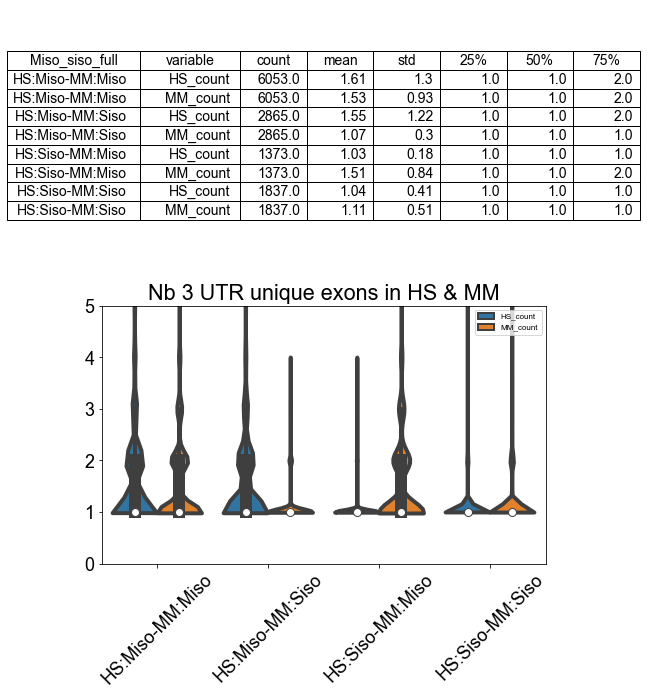

In [76]:
data = pd.merge(
    pd.merge(
        hs_three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        three_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,5)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb 3 UTR unique exons in HS & MM')
ax[1].legend(fontsize=8, title='')

plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_3UTR_unique.png', dpi=300)


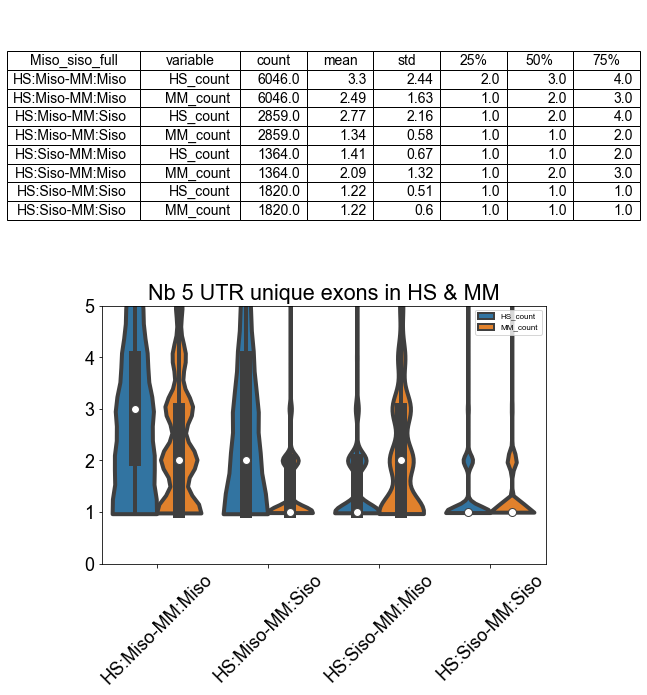

In [77]:
data = pd.merge(
    pd.merge(
        hs_five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        five_UTR.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,5)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb 5 UTR unique exons in HS & MM')
ax[1].legend(fontsize=8, title='')

plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_5UTR_unique.png', dpi=300)


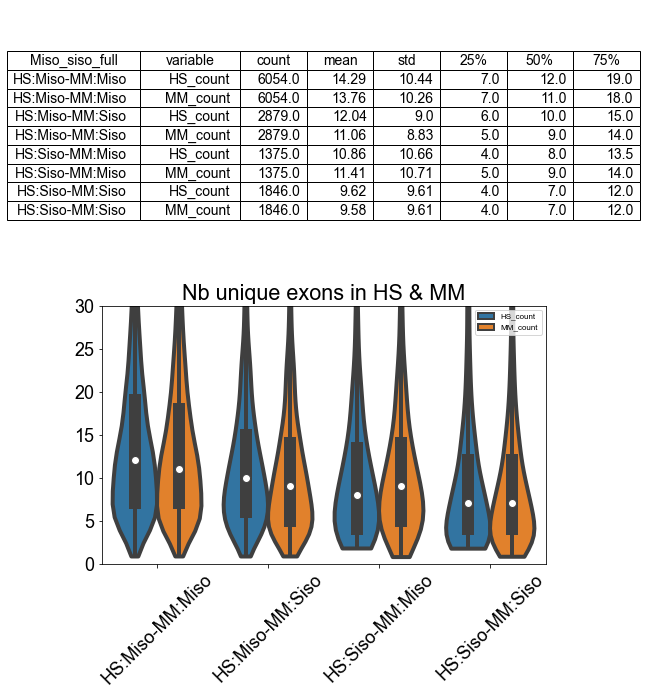

In [83]:
data = pd.merge(
    pd.merge(
        hs_exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        exons.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,30)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb unique exons in HS & MM')
ax[1].legend(fontsize=8, title='')

plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_exons_unique.png', dpi=300)


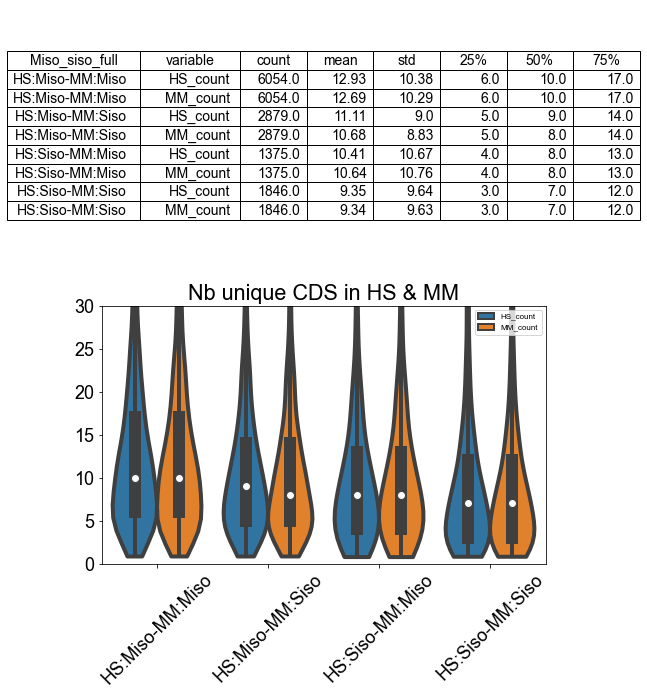

In [85]:
data = pd.merge(
    pd.merge(
        hs_cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('HS_count').reset_index().drop(['Miso_siso'], axis=1),
        cds.groupby(['Miso_siso', 'GeneID'])['Unique_nb'].unique().apply(lambda r:r[0]).rename('MM_count').reset_index().drop(['Miso_siso'], axis=1),
        on='GeneID'
    ),
    new_count.drop(['Miso_siso'], axis=1),
    on='GeneID'
)
data = data.melt(id_vars=['GeneID', 'Miso_siso_full'], value_vars=['HS_count', 'MM_count'])
# data = data.loc[data['value'] >= 5]


ratio_stats = data.sort_values(['Miso_siso_full'], ascending=True).groupby(['Miso_siso_full', 'variable'])['value'].describe().drop(['min', 'max'], axis=1).round(2).reset_index()

ratio_stats

f,ax=plt.subplots(nrows=2, figsize=(10,10))


table = ax[0].table(cellText=ratio_stats.values, colLabels=ratio_stats.columns, loc='center', colWidths=[0.2, 0.15] + [0.1] * (len(list(ratio_stats.columns))-2))
ax[0].axis('tight')
ax[0].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)  # may help



sns.violinplot(data=data.sort_values(['Miso_siso_full'], ascending=True), x='Miso_siso_full', y='value', hue='variable', showfliers=False, linewidth=4, cut=0.1, ax=ax[1], scale="width")
ax[1].set_ylim(0,30)
# plt.axhline(1, ls='--', color='black')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title('Nb unique CDS in HS & MM')
ax[1].legend(fontsize=8, title='')

plt.tight_layout()

f.savefig('/gstock/GeneIso/V2/Figures/Box/nb_cds_unique.png', dpi=300)
